***
# 07. 딥 러닝(Deep Learning) 개요
***

딥 러닝(Deep Learning)은 머신 러닝(Machine Learning)의 특정한 한 분야로서 인공 신경망(Artificial Neural Network)의 층을 연속적으로 깊게 쌓아올려 데이터를 학습하는 방식을 말합니다.
딥 러닝이 화두가 되기 시작한 것은 2010년대의 비교적 최근의 일이지만, 딥 러닝의 기본 구조인 인공 신경망의 역사는 생각보다 오래되었습니다.
이번 챕터에서는 딥 러닝을 보다 쉽게 이해하기 위해 1957년의 초기 인공 신경망인 퍼셉트론에서부터 설명을 시작하여 층을 깊게 쌓아 학습하는 딥 러닝까지 개념을 점차적으로 확장해보겠습니다.
추가적으로 이번 챕터에서는 피드 포워드 신경망과 같은 기본적인 인공 신경망 용어들과 케라스의 사용 방법에 대해서 학습합니다.

## 07-01 퍼셉트론(Perceptron)
***

인공 신경망은 수많은 머신 러닝 방법 중 하나입니다.
하지만 최근 인공 신경망을 복잡하게 쌓아 올린 딥 러닝이 다른 머신 러닝 방법들을 뛰어넘는 성능을 보여주는 사례가 늘면서,
전통적인 머신 러닝과 딥 러닝을 구분해서 이해해야 한다는 목소리가 커지고 있습니다.
딥 러닝을 이해하기 위해서는 우선 인공 신경망에 대한 이해가 필요한데, 여기서는 초기의 인공 신경망인 퍼셉트론(Perceptron)에 대해서 이해합니다.

### 1. 퍼셉트론(Perceptron)
***
퍼셉트론(Perceptron)은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안한 초기 형태의 인공 신경망으로 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘입니다. 
퍼셉트론은 실제 뇌를 구성하는 신경 세포 뉴런의 동작과 유사한데, 신경 세포 뉴런의 그림을 먼저 보도록 하겠습니다.
뉴런은 가지돌기에서 신호를 받아들이고, 이 신호가 일정치 이상의 크기를 가지면 축삭돌기를 통해서 신호를 전달합니다.

![그림](img.png)

다수의 입력을 받는 퍼셉트론의 그림을 보겠습니다. 신경 세포 뉴런의 입력 신호와 출력 신호가 퍼셉트론에서 각각 입력값과 출력값에 해당됩니다.

![그림](img_1.png)

$x$는 입력값을 의미하며, $w$는 가중치(Weight), $y$는 출력값입니다.
그림 안의 원은 인공 뉴런에 해당됩니다. 실제 신경 세포 뉴런에서의 신호를 전달하는 축삭돌기의 역할을 퍼셉트론에서는 가중치가 대신합니다.
각각의 인공 뉴런에서 보내진 입력값 $x$는 각각의 가중치 $w$와 함께 종착지인 인공 뉴런에 전달되고 있습니다.

**각각의 입력값에는 각각의 가중치가 존재하는데, 이때 가중치의 값이 크면 클수록 해당 입력 값이 중요하다는 것을 의미합니다.**

각 입력값이 가중치와 곱해져서 인공 뉴런에 보내지고,
각 입력값과 그에 해당되는 가중치의 곱의 전체 합이 임계치(threshold)를 넘으면 종착지에 있는 인공 뉴런은 출력 신호로서 1을 출력하고,
그렇지 않을 경우에는 0을 출력합니다.
이러한 함수를 계단 함수(Step function)라고 하며, 아래는 그래프는 계단 함수의 하나의 예를 보여줍니다.

![그림](img_2.png)

이때 계단 함수에 사용된 이 임계치값을 수식으로 표현할 때는 보통 세타(Θ)로 표현합니다. 식으로 표현하면 다음과 같습니다.

![그림](img_3.png)

위의 식에서 임계치를 좌변으로 넘기고 편향 $b$(bias)로 표현할 수도 있습니다.
편향 $b$ 또한 퍼셉트론의 입력으로 사용됩니다.
보통 그림으로 표현할 때는 입력값이 1로 고정되고 편향 $b$가 곱해지는 변수로 표현됩니다.

![그림](img_4.png)
![그림](img_5.png)

이 책을 포함한 많은 인공 신경망 자료에서 편의상 편향 $b$가 그림이나 수식에서 생략되서 표현되기도 하지만
실제로는 편향 $b$ 또한 딥 러닝이 최적의 값을 찾아야 할 변수 중 하나입니다.

뒤에서 배우겠지만 이렇게 뉴런에서 출력값을 변경시키는 함수를 활성화 함수(Activation Function)라고 합니다.
초기 인공 신경망 모델인 퍼셉트론은 활성화 함수로 계단 함수를 사용하였지만,
그 뒤에 등장한 여러가지 발전된 신경망들은 계단 함수 외에도 여러 다양한 활성화 함수를 사용하기 시작했습니다.
사실 앞서 배운 시그모이드 함수나 소프트맥스 함수 또한 활성화 함수 중 하나입니다.

퍼셉트론을 배우기 전에 로지스틱 회귀를 먼저 배운 이유도 여기에 있습니다.
퍼셉트론의 활성화 함수는 계단 함수이지만 여기서 활성화 함수를 시그모이드 함수로 변경하면 방금 배운 퍼셉트론은 곧 이진 분류를 수행하는 로지스틱 회귀와 동일함을 알 수 있습니다.

다시 말하면 로지스틱 회귀 모델이 인공 신경망에서는 하나의 인공 뉴런으로 볼 수 있습니다.
로지스틱 회귀를 수행하는 인공 뉴런과 위에서 배운 퍼셉트론의 차이는 오직 활성화 함수의 차이입니다.

![그림](img_6.png)

### 2. 단층 퍼셉트론(Single-Layer Perceptron)
***
위에서 배운 퍼셉트론을 단층 퍼셉트론이라고 합니다.
퍼셉트론은 단층 퍼셉트론과 다층 퍼셉트론으로 나누어진다.

단층 퍼셉트론의 단계 
- 값을 보내는 단계
- 값을 받아서 출력하는 단계

이때 이 각 단계를 보통 층(layer)이라고 부르며, 이 두 개의 층을 입력층(input layer)과 출력층(output layer)이라고 합니다.

![그림](img_7.png)

단층 퍼셉트론이 어떤 일을 할 수 있으며 한계는 무엇인지 학습해보겠습니다.
컴퓨터는 두 개의 값 0과 1을 입력해 하나의 값을 출력하는 회로가 모여 만들어지는데, 이 회로를 게이트(gate)라고 부릅니다.
초기 형태의 인공 신경망인 단층 퍼셉트론은 간단한 XOR 게이트조차도 구현할 수 없는 부족한 인공 신경망이라는 지적을 받았습니다.
단층 퍼셉트론을 이용하면 AND, NAND, OR 게이트는 구현가능합니다. 게이트 연산에 쓰이는 것은 두 개의 입력값과 하나의 출력값입니다.
AND 게이트란 두 개의 입력값 $x1, x2$이 각각 0 또는 1의 값을 가질 수 있으면서 모두 1인 경우에만 출력값 $y$가 1이 나오는 구조를 말합니다.

![그림](img_8.png)

단층 퍼셉트론의 식을 통해 AND 게이트를 만족하는 두 개의 가중치와 편향 값에는 뭐가 있을까요?
각각 $w1$, $w2$, $b$라고 한다면 [0.5, 0.5, -0.7], [0.5, 0.5, -0.8] 또는 [1.0, 1.0, -1.0] 등 이 외에도 다양한 가중치와 편향의 조합이 나올 수 있습니다.
이해를 돕기 위해서 AND 게이트를 위한 매개변수 값을 가진 단층 퍼셉트론의 식을 파이썬 코드로 간단하게 구현해봅시다.

In [1]:
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

위의 함수에 AND 게이트의 입력값을 모두 넣어보면 오직 두 개의 입력값이 1인 경우에만 1을 출력합니다.

In [6]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

그렇다면 두 개의 입력값이 1인 경우에만 출력값이 0, 나머지 입력값의 쌍(pair)에 대해서는 모두 출력값이 1이 나오는 NAND 게이트는 어떨까요?

![그림](img_9.png)

앞서 언급했던 AND 게이트를 충족하는 가중치와 편향값인 [0.5, 0.5, -0.7]에 -를 붙여서 [-0.5, -0.5, +0.7]을 단층 퍼셉트론의 식에 넣어보면 NAND 게이트를 충족합니다.
파이썬 코드를 통해서 이를 확인해봅시다.

In [3]:
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1


단지 같은 코드에 함수 이름과 가중치와 편향만 바꿨을 뿐입니다. 퍼셉트론의 구조는 같기때문입니다.

In [4]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

NAND 게이트를 구현한 파이썬 코드에 입력값을 넣자, 두 개의 입력값이 1인 경우에만 0이 나오는 것을 확인할 수 있습니다.
퍼셉트론으로 NAND 게이트를 구현한 것입니다.
[-0.5, -0.5, -0.7] 외에도 퍼셉트론이 NAND 게이트의 동작을 하도록 하는 다양한 가중치와 편향의 값들이 있을 것입니다.

두 개의 입력이 모두 0인 경우에 출력값이 0이고 나머지 경우에는 모두 출력값이 1인 OR 게이트 또한 적절한 가중치 값과 편향 값만 찾으면 단층 퍼셉트론의 식으로 구현할 수 있습니다.

![그림](img_10.png)

예를 들어 각각 가중치와 편향에 대해서 [0.6, 0.6, -0.5]를 선택하면 OR 게이트를 충족합니다.

In [5]:
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1


In [6]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

이처럼 단층 퍼셉트론은 AND 게이트, NAND 게이트, OR 게이트를 구현할 수 있으나 지금부터 설명할 XOR 게이트는 구현할 수 없습니다.
XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트입니다.
위의 파이썬 코드에 아무리 수많은 가중치와 편향을 넣어봐도 XOR 게이트를 구현하는 것은 불가능합니다.
그 이유는 단층 퍼셉트론은 직선 하나로 두 영역을 나눌 수 있는 문제에 대해서만 구현이 가능하기 때문입니다.

예를 들어 AND 게이트에 대한 단층 퍼셉트론을 시각화해보면 다음과 같습니다.

![그림](img_11.png)

그림에서는 출력값 0을 하얀색 원, 1을 검은색 원으로 표현했습니다. AND 게이트를 충족하려면 하얀색 원과 검은색 원을 직선으로 나누게 됩니다.
마찬가지로 NAND 게이트나 OR 게이트에 대해서도 시각화를 했을 때 직선으로 나누는 것이 가능합니다.

![그림](img_12.png)

그렇다면 XOR 게이트는 어떨까요? XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트입니다.
XOR 게이트를 시각화해보면 다음과 같습니다.

![그림](img_13.png)

하얀색 원과 검은색 원을 직선 하나로 나누는 것은 불가능하므로 단층 퍼셉트론으로는 XOR 게이트를 구현할 수 없습니다.
위의 좌측 그림과 같이 적어도 두 개의 선이 필요합니다. 이를 어떻게 해결할 수 있을까요? 이에 대한 해답은 다층 퍼셉트론입니다.
다층 퍼셉트론을 사용하면 여러 개의 선으로 분류하는 효과를 얻을 수 있습니다.

### 3. 다층 퍼셉트론(MultiLayer Perceptron, MLP)
***

XOR 게이트는 기존의 AND, NAND, OR 게이트를 조합하면 만들 수 있습니다. 퍼셉트론 관점에서 말하면 층을 더 쌓으면 만들 수 있습니다.
다층 퍼셉트론과 단층 퍼셉트론의 차이는 단층 퍼셉트론은 입력층과 출력층만 존재하지만, 다층 퍼셉트론은 중간에 층을 더 추가하였다는 점입니다.
이렇게 입력층과 출력층 사이에 존재하는 층을 은닉층(hidden layer)이라고 합니다.
즉, 다층 퍼셉트론은 중간에 은닉층이 존재한다는 점이 단층 퍼셉트론과 다릅니다. 다층 퍼셉트론은 줄여서 MLP라고도 부릅니다.

![그림](img_14.png)

위의 그림은 AND, NAND, OR 게이트를 조합하여 XOR 게이트를 구현한 다층 퍼셉트론의 예입니다.
XOR 예제에서는 은닉층 1개만으로 문제를 해결할 수 있었지만, 다층 퍼셉트론은 본래 은닉층이 1개 이상인 퍼셉트론을 말합니다.
즉, XOR 문제나 기타 복잡한 문제를 해결하기 위해서 다층 퍼셉트론은 중간에 수많은 은닉층을 더 추가할 수 있습니다.
은닉층의 개수는 2개일 수도 있고, 수십 개일수도 있고 사용자가 설정하기 나름입니다.
아래는 더 어려운 문제를 풀기 위해서 은닉층이 하나 더 추가되고(이 경우에는 은닉층이 2개), 뉴런의 개수를 늘린 다층 퍼셉트론의 모습을 보여줍니다.

![그림](img_15.png)

위와 같이 은닉층이 2개 이상인 신경망을 심층 신경망(Deep Neural Network, DNN) 이라고 합니다.
심층 신경망은 다층 퍼셉트론만 이야기 하는 것이 아니라, 여러 변형된 다양한 신경망들도 은닉층이 2개 이상이 되면 심층 신경망이라고 합니다.

지금까지는 OR, AND, XOR 게이트 등. 퍼셉트론이 제대로 된 정답을 출력할 때까지 저자가 직접 가중치를 바꿔보면서 적절한 가중치를 수동으로 찾았습니다.
하지만 이제는 기계가 가중치를 스스로 찾아내도록 자동화시켜야하는데, 이것이 머신 러닝에서 말하는 훈련(training) 또는 학습(learning) 단계에 해당됩니다.
앞서 선형 회귀와 로지스틱 회귀에서 보았듯이 손실 함수(Loss function)와 옵티마이저(Optimizer)를 사용합니다.
그리고 만약 학습을 시키는 인공 신경망이 심층 신경망일 경우에는 이를 심층 신경망을 학습시킨다고 하여, 딥 러닝(Deep Learning)이라고 합니다.

In [7]:
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1
    
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1    
    
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1
    
# def XOR_gate_1(x1, x2):
#     s1 = OR_gate(x1, x2)
#     s2 = NAND_gate(x1, x2)
#     if x1 == 1 and x2 == 1:
#         return s2
#     else:
#         return s1
#     
# def XOR_gate_2(x1, x2):
#     s1 = OR_gate(x1, x2)
#     s2 = NAND_gate(x1, x2)
#     if x1 & x2 == 1:
#         return s2
#     else:
#         return s1
    
def XOR_gate(x1, x2):
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)
    y = AND_gate(s1, s2)
    return y

In [25]:
# XOR_gate_1(0, 0), XOR_gate_1(0, 1), XOR_gate_1(1, 0), XOR_gate_1(1, 1)

(0, 1, 1, 0)

In [26]:
# XOR_gate_2(0, 0), XOR_gate_2(0, 1), XOR_gate_2(1, 0), XOR_gate_2(1, 1)

(0, 1, 1, 0)

In [8]:
XOR_gate(0, 0), XOR_gate(0, 1), XOR_gate(1, 0), XOR_gate(1, 1)

(0, 1, 1, 0)

## 07-02 인공 신경망(Artificial Neural Network) 훑어보기
***

### 1. 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)
***

![그림](img_16.png)

위 그림의 다층 퍼셉트론(MLP)과 같이 오직 입력층에서 출력층 방향으로 연산이 전개되는 신경망을 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)이라고 합니다.

![그림](img_17.png)

위의 그림은 FFNN에 속하지 않는 RNN이라는 신경망을 보여줍니다.
이 신경망은 은닉층의 출력값을 출력층으로도 값을 보내지만, 동시에 은닉층의 출력값이 다시 은닉층의 입력으로 사용됩니다.

### 2. 전결합층(Fully-connected layer, FC, Dense layer)
***

다층 퍼셉트론은 은닉층과 출력층에 있는 모든 뉴런은 바로 이전 층의 모든 뉴런과 연결돼 있었습니다.
그와 같이 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결돼 있는 층을 전결합층(Fully-connected layer) 또는 완전연결층이라고 합니다.
줄여서 FC라고 부르기도 합니다. 앞서 본 다층 퍼셉트론의 모든 은닉층과 출력층은 전결합층입니다.
동일한 의미로 밀집층(Dense layer) 이라고 부르기도 하는데, 케라스에서는 밀집층을 구현할 때 Dense()를 사용합니다.

### 3. 활성화 함수(Activation Function)
***

![그림](img_18.png)

앞서 배운 퍼셉트론에서는 계단 함수(Step function)를 통해 출력값이 0이 될지, 1이 될지를 결정했습니다.
이러한 매커니즘은 실제 뇌를 구성하는 신경 세포 뉴런이 전위가 일정치 이상이 되면 시냅스가 서로 화학적으로 연결되는 모습을 모방한 것입니다.
이렇게 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수를 활성화 함수(Activation function)라고 하는데 계단 함수는 이러한 활성화 함수의 하나의 예제에 불과합니다.

다양한 활성화 함수에 대해서 정리해봅시다. 일부는 머신 러닝 챕터에서 이미 봤던 함수들입니다.

#### (1) 활성화 함수의 특징 - 비선형 함수(Nonlinear function)

활성화 함수의 특징은 선형 함수가 아닌 비선형 함수여야 한다는 점입니다. 선형 함수란 출력이 입력의 상수배만큼 변하는 함수를 선형함수라고 합니다.
예를 들어 $f(x) = wx + b$라는 함수가 있을 때, $w$와 $b$는 상수입니다.
이 식을 그래프로 시각화하면 직선입니다. 반대로 비선형 함수는 직선 1개로는 그릴 수 없는 함수를 말합니다.

인공 신경망에서 활성화 함수는 비선형 함수여야 합니다.
앞서 퍼셉트론에서도 계단 함수라는 활성화 함수를 사용했는데 계단 함수 또한 비선형 함수에 속합니다.
인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 합니다.
그런데 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없습니다.
예를 들어 활성화 함수로 선형 함수를 선택하고, 층을 계속 쌓는다고 가정해보겠습니다.
활성화 함수는 $f(x) = wx$라고 가정합니다.
여기다가 은닉층을 두 개 추가한다고하면 출력층을 포함해서 $y(x) = f(f(f(x)))$가 됩니다.
이를 식으로 표현하면 $w \times w \times w \times w$입니다.
그런데 이는 잘 생각해보면 $w$의 세 제곱값을 $k$라고 정의해버리면 $y(x) = kx$와 같이 다시 표현이 가능합니다.
이 경우, 선형 함수로 은닉층을 여러번 추가하더라도 1회 추가한 것과 차이가 없음을 알 수 있습니다.

활성화 함수가 존재하지 않는 선형 함수 층을 사용하지 않는다는 의미는 아닙니다.
종종 활성화 함수를 사용하지 않는 층을 비선형 층들과 함께 인공 신경망의 일부로서 추가하는 경우도 있는데, 학습 가능한 가중치가 새로 생긴다는 점에서 의미가 있습니다.
이와 같이 선형 함수를 사용한 층을 활성화 함수를 사용하는 은닉층과 구분하기 위해서 이 책에서는 선형층(linear layer)이나 투사층(projection layer) 등의 다른 표현을 사용하여 표현합니다.
뒤의 챕터에서 언급할 임베딩 층(embedding layer)도 일종의 선형층입니다. 임베딩 층에는 활성화 함수가 존재하지 않습니다.
활성화 함수를 사용하는 일반적인 은닉층을 선형층과 대비되는 표현을 사용하면 비선형층(nonlinear layer)입니다.

파이썬을 통해 주로 사용되는 활성화 함수를 직접 그려봅시다.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#### (2) 계단 함수(Step function)

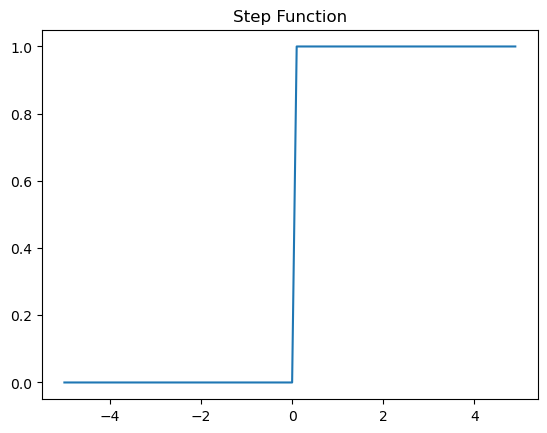

In [7]:
def step(x):
    return np.array(x > 0, dtype=int) # 0보다 크면 1 return 
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

계단 함수는 거의 사용되지 않지만 퍼셉트론을 통해 인공 신경망을 처음 배울 때 접하게 되는 활성화 함수입니다.

#### (3) 시그모이드 함수(Sigmoid function)와 기울기 소실

시그모이드 함수를 사용한 인공 신경망이 있다고 가정해보겠습니다.

![그림](img_19.png)

위 인공 신경망의 학습 과정은 다음과 같습니다.
우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고,
그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고,
그리고 이 손실(오차라고도 부릅니다. loss)을 미분을 통해서 기울기(gradient)를 구하고,
이를 통해 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정인 역전파(back propagation)를 수행합니다.
역전파에 대해서는 뒤에서 더 자세히 설명하겠지만 일단 여기에서는 인공 신경망에서 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정이라고만 언급해두겠습니다.
역전파 과정에서 인공 신경망은 경사 하강법을 사용합니다.

이 시그모이드 함수의 문제점은 미분을 해서 기울기(gradient)를 구할 때 발생합니다.

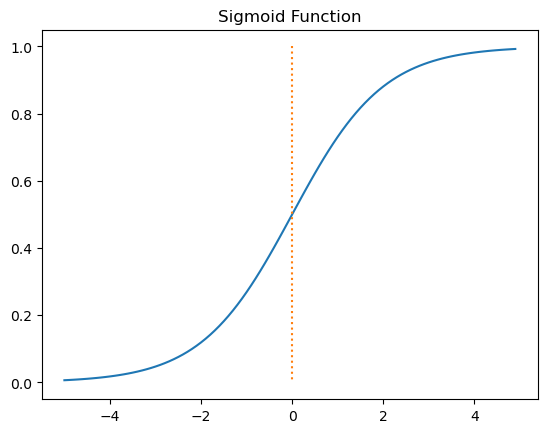

In [8]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

위 그래프는 시그모이드 함수의 그래프를 보여줍니다.
시그모이드 함수의 출력값이 0 또는 1에 가까워지면, 그래프의 기울기가 완만해지는 모습을 볼 수 있습니다.
기울기가 완만해지는 구간을 주황색, 그렇지 않은 구간을 초록색으로 칠해보겠습니다.

![그래프](img_21.png)

주황색 구간에서는 미분값이 0에 가까운 아주 작은 값입니다. 초록색 구간에서의 미분값은 최대값이 0.25입니다.
다시 말해 시그모이드 함수를 미분한 값은 적어도 0.25 이하의 값입니다.
시그모이드 함수를 활성화 함수로하는 인공 신경망의 층을 쌓는다면, 가중치와 편향을 업데이트 하는 과정인 역전파 과정에서 0에 가까운 값이 누적해서 곱해지게 되면서,
앞단에는 기울기(미분값)가 잘 전달되지 않게 됩니다. 이러한 현상을 기울기 소실(Vanishing Gradient) 문제라고 합니다.

시그모이드 함수를 사용하는 은닉층의 개수가 다수가 될 경우에는 0에 가까운 기울기가 계속 곱해지면 앞단에서는 거의 기울기를 전파받을 수 없게 됩니다.
다시 말해 매개변수 $w$가 업데이트 되지 않아 학습이 되지를 않습니다.

![그래프](img_20.png)

위의 그림은 은닉층이 깊은 신경망에서 기울기 소실 문제로 인해 출력층과 가까운 은닉층에서는 기울기가 잘 전파되지만,
앞단으로 갈수록 기울기가 제대로 전파되지 않는 모습을 보여줍니다. 결론적으로 시그모이드 함수의 은닉층에서의 사용은 지양됩니다.
시그모이드 함수는 주로 이진 분류를 위해 출력층에서 사용합니다.

#### (4) 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환합니다. 그래프를 그려보겠습니다.

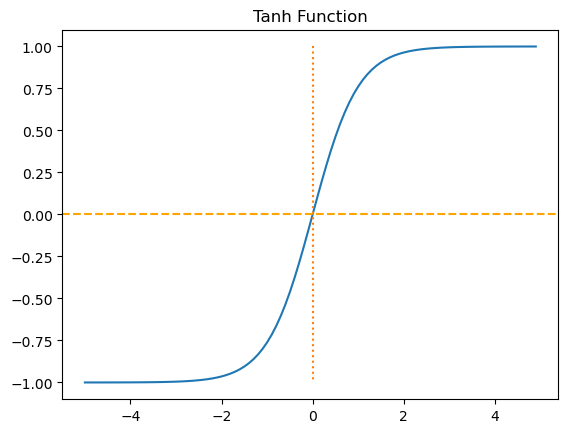

In [10]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

#### (5) 렐루 함수(ReLU)

인공 신경망의 은닉층에서 가장 인기있는 함수입니다. 수식은 $f(x) = max(0, x)$로 아주 간단합니다.

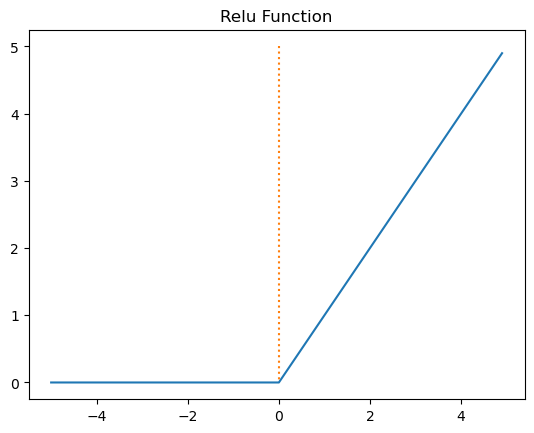

In [11]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환하는 것이 특징인 함수로 출력값이 특정 양수값에 수렴하지 않습니다.
0이상의 입력값의 경우에는 미분값이 항상 1입니다. 깊은 신경망의 은닉층에서 시그모이드 함수보다 훨씬 더 잘 작동합니다.
뿐만 아니라, 렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠릅니다.

하지만 여전히 문제점이 존재하는데, 입력값이 음수면 기울기. 즉, 미분값도 0이 됩니다.
그리고 이 뉴런은 다시 회생하는 것이 매우 어렵습니다. 이 문제를 죽은 렐루(dying ReLU)라고 합니다.

#### (6) 리키 렐루(Leaky ReLU)

죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했습니다. 변형 함수는 여러 개가 있지만 여기서는 Leaky ReLU에 대해서만 소개합니다.
Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있습니다. 수식은 $f(x) = max(ax, x)$로 아주 간단합니다.
a는 하이퍼파라미터로 Leaky('새는') 정도를 결정하며 일반적으로는 0.01의 값을 가집니다.
여기서 말하는 '새는 정도'라는 것은 입력값의 음수일 때의 기울기를 비유하고 있습니다.

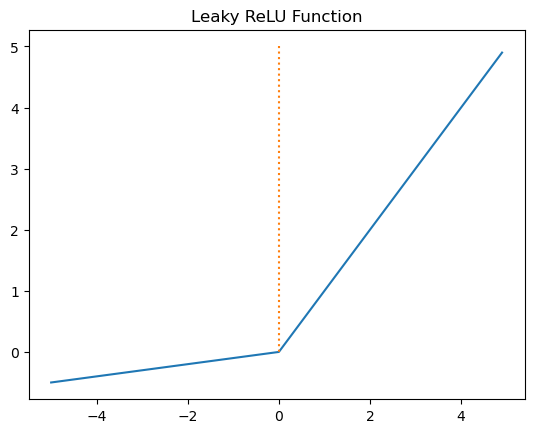

In [12]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()


위의 그래프에서는 새는 모습을 확실히 보여주기 위해 a를 0.1로 잡았습니다. 위와 같이 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않습니다.

#### (7) 소프트맥스 함수(Softmax function)

은닉층에서는 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적입니다.
반면, 소프트맥스 함수는 시그모이드 함수처럼 출력층에서 주로 사용됩니다.
시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면
소프트맥스 함수는 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용됩니다.
다시 말해서 딥 러닝으로 이진 분류를 할 때는 출력층에 앞서 배운 로지스틱 회귀를 사용하고,
딥 러닝으로 다중 클래스 분류 문제를 풀 때는 출력층에 소프트맥스 회귀를 사용한다고 생각할 수 있습니다.

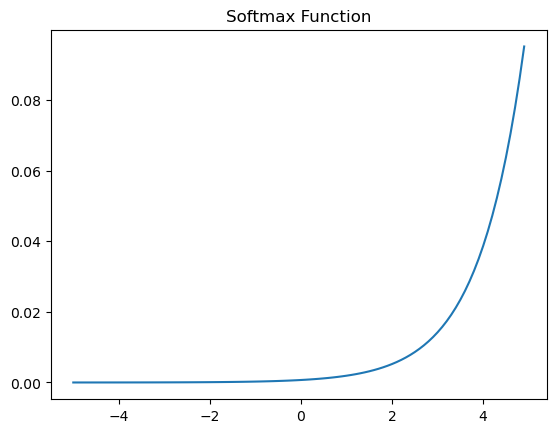

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

## 07-03 행렬곱으로 이해하는 신경망
***

인공 신경망에서 입력층에서 출력층 방향으로 연산을 진행하는 과정을 순전파(Forward Propagation)라고 합니다.
다르게 말하면 주어진 입력이 입력층으로 들어가서 은닉층을 지나 출력층에서 예측값을 얻는 과정을 순전파라고 합니다.
여기서는 신경망의 순전파는 결과적으로 행렬의 곱셈으로 이해할 수 있다는 것과
다층 퍼셉트론 내의 학습 가능한 매개변수인 가중치 $w$와 편향 $b$의 개수를 추정하는 방법에 대해서 학습합니다.

### 1. 순전파(Foward Propagation)
***

![그림](img_22.png)

활성화 함수, 은닉층의 수, 각 은닉층의 뉴런 수 등 딥 러닝 모델을 설계하고나면
입력값은 입력층, 은닉층을 지나면서 각 층에서의 가중치와 함께 연산되며 출력층으로 향합니다.
그리고 출력층에서 모든 연산을 마친 예측값이 나오게 됩니다.
이와 같이 입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정을 순전파라고 합니다.

### 2. 행렬곱으로 순전파 이해하기
***

![그림](img_23.png)

위와 같은 인공 신경망이 있다고 해봅시다. 입력의 차원이 3, 출력의 차원이 2인 위 인공 신경망을 구현해본다면 다음과 같습니다.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))

소프트맥스 회귀를 한다고 가정하고 활성화 함수는 소프트맥스 함수를 임의로 기재하였습니다.
인공 신경망이란 표현이 아직 어색한다면 앞에서 배운 소프트맥스 회귀 모델을 만들었다고 생각해도 되겠습니다.
소프트맥스 회귀는 출력 벡터의 차원을 2로 두면 이진 분류를 수행하는 모델이 됩니다. 로지스틱 회귀가 아닌 소프트맥스 회귀로도 이진 분류는 수행 가능함을 기억해둡시다.

케라스에서는 .summary()를 사용하면 해당 모델에 존재하는 모든 매개변수(가중치 $w$와 편향 $b$의 개수)를 확인할 수 있습니다.

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


매개변수의 수가 8개라고 나옵니다.
위 신경망에서 학습가능한 매개변수 인 $w$와 $b$의 개수가 총 합해서 8개라는 의미입니다.
실제로 그런지 위 신경망을 행렬의 곱셈 관점에서 이해해봅시다.

![그림](img_24.png)

위 모델은 입력의 차원이 3, 출력의 차원이 2입니다.
또는 신경망의 용어로서 표현한다면, 입력층의 뉴런이 3개, 출력층의 뉴런이 2개라고 말할 수 있습니다.
위 신경망 그림에서 화살표 각각은 가중치 $w$를 의미하고 있습니다.
3개의 뉴런과 2개의 뉴런 사이에는 총 6개의 화살표가 존재하는데, 이는 위 신경망에서 가중치 $w$의 개수가 6개임을 의미합니다.

이를 행렬곱 관점에서는 3차원 벡터에서 2차원 벡터가 되기 위해서 3 × 2 행렬을 곱했다고 이해할 수 있습니다. 그리고 이 행렬 각각의 원소가 각각의 
$w$가 되는 것입니다. 위 그림에서는 
$y1$에 연결되는 화살표 $w1$, $w2$, $w3$를 주황색으로 표현하고, 
$y2$에 연결되는 화살표 $w4$, $w5$, $w6$를 초록색으로 표현했습니다.

일반적으로 동그란 뉴런과 화살표로 표현하는 인공 신경망의 그림에서는 편향 $b$의 경우에는 편의상 생략되는 경우가 많지만,
인공 신경망 내부적으로는 편향 $b$의 연산 또한 존재합니다.
위 그림에서 뉴런과 화살표로 표현한 인공 신경망의 그림에서는 편향을 표현하지 않았지만,
행렬 연산식에서는 $b1$과 $b2$를 표현하였습니다.
편향 $b$의 개수는 항상 출력의 차원을 기준으로 개수를 확인하면 됩니다.
위의 인공 신경망의 경우에는 출력의 차원이 2인데, 이에 따라서 편향 또한 $b1$과 $b2$로 두 개입니다.

가중치 $w$의 개수가 $w1$, $w2$, $w3$, $w4$, $w5$, $w6$로 총 6개이며
편향 $b$의 개수가 $b1$과 $b2$로 두 개이므로 총 학습가능한 매개변수의 수는 8개입니다.
이는 앞서 model.summary()를 하였을 때 확인한 매개변수의 수인 8개와 일치합니다.

$y1$과 $y2$를 구하는 과정을 수식으로 표현한다면 다음과 같이 표현할 수 있습니다.

![수식](img_25.png)

좀 더 간단하게 식을 표현해보겠습니다. 입력 $x1, x2, x3$을 벡터 $X$로 명명합니다.
$X = [x1, x2, x3]$

그리고 $w1$, $w2$, $w3$, $w4$, $w5$, $w6$를 원소로 하는 3 × 2 행렬을 가중치 행렬 $W$,
그리고 편향 $b1$, $b2$를 원소로 하는 벡터를 $B$,
그리고 $y1$, $y2$를 원소로하는 출력 벡터를 $Y$로 명명합시다.
이 경우, 위의 인공 신경망은 다음과 같이 표현할 수 있습니다.

![그림](img_26.png)

다시 말해 수식은 다음과 같습니다.

$Y = XW + B$

### 3. 행렬곱으로 병렬 연산 이해하기
***

인공 신경망을 행렬곱으로 구현할 때의 흥미로운 점은 행렬곱을 사용하면 병렬 연산도 가능하다는 점입니다.
위의 예시에서는 데이터 중 1개의 샘플만을 처리한다고 가정했습니다.
이번에는 인공 신경망이 4개의 샘플을 동시에 처리해본다고 가정해봅시다.
4개의 샘플을 하나의 행렬 $X$로 정의하고 인공 신경망의 순전파를 행렬곱으로 표현하면 다음과 같습니다.

![그림](img_27.png)

여기서 혼동하지 말아야 할 것은 인공 신경망의 4개의 샘플을 동시에 처리하고 있지만, 여기서 학습가능한 매개변수의 수는 여전히 8개라는 점입니다.
이렇게 인공 신경망이 다수의 샘플을 동시에 처리하는 것을 우리는 '배치 연산'이라고 부릅니다.

난이도를 올려서 중간에 층을 더 추가해봅시다.

### 4. 행렬곱으로 다층 퍼셉트론의 순전파 이해하기
***

![그림](img_28.png)

위와 같은 인공 신경망이 있다고 합시다. 주어진 인공 신경망을 케라스로 구현해본다면 아래와 같이 구현할 수 있습니다.

#### 1) 코드로 구현하기

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))


위의 코드의 주석에서 () 괄호 안의 값은 각 층에서의 뉴런의 수를 의미하며 입력층부터 출력층까지 순차적으로 인공 신경망의 층을 한 층씩 추가하였습니다.
케라스를 사용하면 이렇게 간단하게 층을 딥하게 쌓은 딥 러닝 모델을 구현할 수 있습니다.

#### 2) 행렬의 크기 추정해보기

우선 각 층을 기준으로 입력과 출력의 개수를 정리하면 다음과 같습니다.

입력층 : 4개의 입력과 8개의 출력
은닉층1 : 8개의 입력과 8개의 출력
은닉층2 : 8개의 입력과 3개의 출력
출력층 : 3개의 입력과 3개의 출력

위의 정보를 가지고 층마다 생기는 가중치와 편향 행렬의 크기를 추정해봅시다. 단, 배치 크기는 1을 가정합니다.

##### 1. 입력층 ⇒ 은닉층1

![설명](img_29.png)

##### 2. 은닉층1 ⇒ 은닉층2

![설명](img_30.png)

##### 3. 은닉층2 ⇒ 은닉층3

![설명](img_31.png)

## 07-04 딥 러닝의 학습 방법
***

딥 러닝의 학습 방법의 이해를 위해 필요한 개념인 손실 함수, 옵티마이저, 에포크의 개념에 대해서 정리합니다.

### 1. 손실 함수(Loss function)
***

![그림](img_32.png)

손실 함수는 실제값과 예측값의 차이를 수치화해주는 함수입니다. 이 두 값의 차이.
즉, 오차가 클 수록 손실 함수의 값은 크고 오차가 작을 수록 손실 함수의 값은 작아집니다.
회귀에서는 평균 제곱 오차, 분류 문제에서는 크로스 엔트로피를 주로 손실 함수로 사용합니다.
손실 함수의 값을 최소화하는 두 개의 매개변수인 가중치 $w$와 편향 $b$의 값을 찾는 것이 딥 러닝의 학습 과정이므로 손실 함수의 선정은 매우 중요합니다.
앞서 설명했던 손실 함수를 정리해봅시다.

#### 1) MSE(Mean Squared Error, MSE)

평균 제곱 오차는 선형 회귀를 학습할 때 배웠던 손실 함수입니다. 연속형 변수를 예측할 때 사용됩니다.

다음과 같이 compile의 loss에 문자열 'mse'라고 기재하여 사용할 수 있습니다.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

model = Sequential()

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

딥 러닝 자연어 처리는 대부분 분류 문제이므로 평균 제곱 오차보다는 아래의 크로스 엔트로피 함수들을 주로 사용합니다.

#### 2) 이진 크로스 엔트로피(Binary Cross-Entropy)

이항 교차 엔트로피라고도 부르는 손실 함수입니다.
출력층에서 시그모이드 함수를 사용하는 이진 분류 (Binary Classification)의 경우 binary_crossentropy를 사용합니다.
compile의 loss에 문자열로 'binary_crossentropy'를 기재해주면 됩니다. 이는 로지스틱 회귀에서 사용했던 손실 함수입니다.

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.

In [13]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])

#### 3) 카테고리칼 크로스 엔트로피(Categorical Cross-Entropy)

범주형 교차 엔트로피라고도 부르는 손실 함수입니다.
출력층에서 소프트맥스 함수를 사용하는 다중 클래스 분류(Multi-Class Classification)일 경우 categorical_crossentropy를 사용합니다.
compile의 loss에 문자열로 'categorical_crossentropy'를 기재해주면 됩니다. 소프트맥스 회귀에서 사용했던 손실 함수입니다.

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용할 수도 있습니다.

In [15]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

만약 레이블에 대해서 원-핫 인코딩 과정을 생략하고, 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행하고 싶다면
다음과 같이 'sparse_categorical_crossentropy'를 사용합니다.

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

위 코드는 아래와 같이 사용할 수도 있습니다.

In [17]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

#### 4) 그 외에 다양한 손실 함수들

아래의 텐서플로우 공식 문서 링크에서 방금 언급하지 않은 손실 함수 외에도 다양한 손실 함수들을 확인할 수 있습니다.

[손실함수 참조링크](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

지금까지 자주 사용하는 손실 함수 몇 가지에 대해서 정리해봤습니다.
위 compile 코드에서 optimizer='adam' 이라는 부분에 주목해봅시다.
이는 아담이라는 옵티마이저를 사용했다라는 의미입니다.
손실 함수의 선정만큼이나 옵티마이저의 선정 또한 중요합니다.
이어서 옵티마이저에 대해서 정리해봅시다.

### 2. 배치 크기(Batch Size)에 따른 경사 하강법
***

![그림](img_33.png)

손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라집니다.
여기서 배치(Batch)라는 개념에 대한 이해가 필요합니다. 배치는 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양을 말합니다.
전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정할 수 있습니다.

#### 1) 배치 경사 하강법(Batch Gradient Descent)

배치 경사 하강법(Batch Gradient Descent)은 가장 기본적인 경사 하강법입니다.
배치 경사 하강법은 옵티마이저 중 하나로 오차(loss)를 구할 때 전체 데이터를 고려합니다.
딥 러닝에서는 전체 데이터에 대한 한 번의 훈련 횟수를 1 에포크라고 하는데, 배치 경사 하강법은 한 번의 에포크에 모든 매개변수 업데이트를 단 한 번 수행합니다.
배치 경사 하강법은 전체 데이터를 고려해서 학습하므로 한 번의 매개 변수 업데이트에 시간이 오래 걸리며, 메모리를 크게 요구한다는 단점이 있습니다.
<br/>
```
model.fit(X_train, y_train, batch_size=len(X_train))
```

#### 2) 배치 크기가 1인 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

기존의 배치 경사 하강법은 전체 데이터에 대해서 계산을 하다보니 시간이 너무 오래걸린다는 단점이 있습니다.
배치 크기가 1인 확률적 경사 하강법은 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법입니다.
더 적은 데이터를 사용하므로 더 빠르게 계산할 수 있습니다.

![그림](img_34.png)

위 그림에서 좌측은 배치 경사 하강법, 우측은 배치 크기가 1인 확률적 경사 하강법이 최적해를 찾아가는 모습을 보여주고 있습니다.
확률적 경사 하강법은 매개변수의 변경폭이 불안정하고, 때로는 배치 경사 하강법보다 정확도가 낮을 수도 있지만
하나의 데이터에 대해서만 메모리에 저장하면 되므로 자원이 적은 컴퓨터에서도 쉽게 사용가능 하다는 장점이 있습니다. 케라스에서는 아래와 같이 사용합니다.
<br/>
```
model.fit(X_train, y_train, batch_size=1)
```

#### 3) 미니 배치 경사 하강법(Mini-Batch Gradient Descent)

전체 데이터도, 1개의 데이터도 아닐 때, 배치 크기를 지정하여 해당 데이터 개수만큼에 대해서 계산하여 매개 변수의 값을 조정하는 경사 하강법을 미니 배치 경사 하강법이라고 합니다.
미니 배치 경사 하강법은 전체 데이터를 계산하는 것보다 빠르며, SGD보다 안정적이라는 장점이 있습니다.
가장 많이 사용되는 경사 하강법으로 앞으로 이 책에서도 주로 배치 크기를 지정하여 미니 배치 경사 하강법으로 학습하게 될 것입니다.
아래의 코드는 배치 크기를 128로 지정했을 경우를 보여줍니다.
<br/>
```
model.fit(X_train, y_train, batch_size=128)
```

배치 크기는 일반적으로 2의 n제곱에 해당하는 숫자로 선택하는 것이 보편적입니다.
만약, model.fit()에서 배치 크기를 별도로 지정해주지 않을 경우에 기본값은 2의 5제곱에 해당하는 숫자인 32로 설정됩니다.
지금까지 배치 크기에 따른 학습 방법의 차이를 알아봤습니다.
앞으로는 경사 하강법의 알고리즘 자체를 조금씩 달리한 다양한 옵티마이저에 대해서 설명합니다.

### 3. 옵티마이저(Optimizer)
***

#### 1) 모멘텀(Momentum)

모멘텀(Momentum)은 관성이라는 물리학의 법칙을 응용한 방법입니다.
모멘텀 경사 하강법에 관성을 더 해줍니다.
모멘텀은 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영합니다.
이렇게 하면 마치 언덕에서 공이 내려올 때, 중간에 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있습니다.

![그래프](img_35.png)

전체 함수에 걸쳐 최소값을 글로벌 미니멈(Global Minimum) 이라고 하고, 글로벌 미니멈이 아닌 특정 구역에서의 최소값인 로컬 미니멈(Local Minimum) 이라고 합니다. 로컬 미니멈에 도달하였을 때 글로벌 미니멈으로 잘못 인식하여 탈출하지 못하였을 상황에서 모멘텀. 즉, 관성의 힘을 빌리면 값이 조절되면서 현재의 로컬 미니멈에서 탈출하고 글로벌 미니멈 내지는 더 낮은 로컬 미니멈으로 갈 수 있는 효과를 얻을 수도 있습니다.
<br/>
```
tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
```

#### 2) 아다그라드(Adagrad)

매개변수들은 각자 의미하는 바가 다른데, 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적입니다. 아다그라드는 각 매개변수에 서로 다른 학습률을 적용시킵니다. 이때 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정시킵니다.
<br/>
```
tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)
```

#### 3) 알엠에스프롭(RMSprop)

아다그라드는 학습을 계속 진행한 경우에는, 나중에 가서는 학습률이 지나치게 떨어진다는 단점이 있는데 이를 다른 수식으로 대체하여 이러한 단점을 개선하였습니다.
<br/>
```
tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
```

#### 4) 아담(Adam)

아담은 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법으로, 방향과 학습률 두 가지를 모두 잡기 위한 방법입니다.
<br/>
```
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
```

#### 5) 사용 방법

각 옵티마이저 인스턴스는 compile의 optimizer에서 호출합니다. 예를 들어 아담(adam)은 다음과 같이 코드를 작성합니다.
<br/>
```
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
```

하지만 다음과 같이 단순히 문자열로 'adam'으로 작성하더라도 동작합니다.
<br/>
```
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
```

다른 옵티마이저들도 마찬가지입니다.
optimizer='sgd', optimizer='rmsprop'와 같이 각 옵티마이저를 문자열로 호출할 수 있습니다.
케라스의 옵티마이저 사용법은 아래의 링크에서 좀 더 상세히 확인할 수 있습니다.

[옵티마이저 참조링크](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

### 4. 역전파(BackPropagation)
***

이 부분은 05) 역전파 챕터로 별도 작성되었습니다.

### 5. 에포크와 배치 크기와 이터레이션(Epochs and Batch size and Iteration)
***

기계는 실제값과 예측값의 오차로부터 옵티마이저를 통해서 가중치를 업데이트합니다.
머신 러닝에서는 이 과정을 학습이라고 합니다.
이를 현실의 학습에 비유하면 사람은 문제지의 문제를 풀고,
정답지의 정답을 보면서 채점을 하면서 부족했던 점을 깨달으며 머릿속의 지식이 업데이트되는 과정입니다.

그런데 사람마다 동일한 문제지와 정답지를 주더라도 공부 방법은 사실 천차만별입니다.
어떤 사람은 문제지 하나를 다 풀고 나서 정답을 채점하는데 어떤 사람은 문제지의 문제를 10개 단위로 끊어서 공부합니다.
문제 10개를 풀고 채점하고 다시 다음 문제 10개를 풀고 채점하고 반복하는 방식으로 학습하는 방식입니다.
또한 게으른 사람은 문제지를 세 번 공부하는데, 성실한 사람은 문제지의 문제를 달달 외울만큼 문제지를 100번 공부합니다.
기계도 똑같습니다. 같은 문제지와 정답지를 주더라도 공부 방법을 다르게 설정할 수 있습니다.

![그림](img_36.png)

위 그림은 에포크와 배치 크기와 이터레이션의 차이를 보여줍니다.

#### 1) 에포크(Epoch)

에포크란 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태를 말합니다.
전체 데이터를 하나의 문제지에 비유한다면 문제지의 모든 문제를 끝까지 다 풀고, 정답지로 채점을 하여 문제지에 대한 공부를 한 번 끝낸 상태를 말합니다.

만약 에포크가 50이라고 하면, 전체 데이터 단위로는 총 50번 학습합니다.
문제지에 비유하면 문제지를 50번 푼 셈입니다.
이 에포크 횟수가 지나치거나 너무 적으면 앞서 배운 과적합과 과소적합이 발생할 수 있습니다.

#### 2) 배치 크기(Batch size)

배치 크기는 몇 개의 데이터 단위로 매개변수를 업데이트 하는지를 말합니다.
현실에 비유하면 문제지에서 몇 개씩 문제를 풀고나서 정답지를 확인하느냐의 문제입니다.
사람은 문제를 풀고 정답을 보는 순간 부족했던 점을 깨달으며 지식이 업데이트 된다고 하였습니다.
기계 입장에서는 실제값과 예측값으로부터 오차를 계산하고 옵티마이저가 매개변수를 업데이트합니다.
여기서 중요한 포인트는 업데이트가 시작되는 시점이 정답지/실제값을 확인하는 시점이라는 겁니다.

사람이 2,000 문제가 수록되어있는 문제지의 문제를 200개 단위로 풀고 채점한다고 하면 이때 배치 크기는 200입니다.
기계는 배치 크기가 200이면 200개의 샘플 단위로 가중치를 업데이트 합니다.

여기서 주의할 점은 배치 크기와 배치의 수는 다른 개념이라는 점입니다.
**전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10입니다.**
이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10)이기도 합니다.
이때 **배치의 수**를 **이터레이션**이라고 합니다.

#### 3) 이터레이션(Iteration) 또는 스텝(Step)

이터레이션이란 한 번의 에포크를 끝내기 위해서 필요한 배치의 수를 말합니다.
또는 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수이기도 합니다.
전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10입니다.
이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다는 것을 의미합니다.
배치 크기가 1인 확률적 경사 하강법을 이 개념을 가지고 다시 설명하면 배치 크기가 1이므로 모든 이터레이션마다 하나의 데이터를 선택하여 경사 하강법을 수행합니다.
이터레이션은 스텝(Step)이라고 부르기도 하므로 두 용어 모두 기억해둡시다.

## 07-05 역전파(BackPropagation) 이해하기
***
인공 신경망이 순전파 과정을 진행하여 예측값과 실제값의 오차를 계산하였을 때 어떻게 역전파 과정에서 경사 하강법을 사용하여 가중치를 업데이트하는지 직접 계산을 통해 이해해봅시다.

### 1. 인공 신경망의 이해(Neural Network Overview)
***

우선 예제를 위해 사용될 인공 신경망을 소개합니다. 역전파의 이해를 위해서 여기서 사용할 인공 신경망은 입력층, 은닉층, 출력층 이렇게 3개의 층을 가집니다. 또한 해당 인공 신경망은 두 개의 입력과, 두 개의 은닉층 뉴런, 두 개의 출력층 뉴런을 사용합니다. 은닉층과 출력층의 모든 뉴런은 활성화 함수로 시그모이드 함수를 사용합니다.

![그림](img_37.png)

위의 그림은 여기서 사용할 인공 신경망의 모습을 보여줍니다. 은닉층과 출력층의 모든 뉴런에서 변수 $z$
가 존재하는데 여기서 변수 $z$
는 이전층의 모든 입력이 각각의 가중치와 곱해진 값들이 모두 더해진 가중합을 의미합니다. 이 값은 뉴런에서 아직 시그모이드 함수를 거치지 않은 상태입니다. 즉, 활성화 함수의 입력을 의미합니다. 
 $z$우측의 |를 지나서 존재하는 변수 $h$ 
 또는 $o$
는 $z$
가 시그모이드 함수를 지난 후의 값으로 각 뉴런의 출력값을 의미합니다. 이번 역전파 예제에서는 인공 신경망에 존재하는 모든 가중치 $w$
에 대해서 역전파를 통해 업데이트하는 것을 목표로합니다. 해당 인공 신경망은 편향 
$b$는 고려하지 않습니다.

### 2. 순전파(Forward Propagation)
***

![그림](img_38.png)



### 3. 역전파 1단계(BackPropagation Step 1)
***

![그림](img_39.png)

### 4. 역전파 2단계(BackPropagation Step 2)
***

![그림](img_40.png)

### 5. 결과 확인
***

![그림](img_41.png)

## 07-06 과적합(Overfitting)을 막는 방법들
***

학습 데이터에 모델이 과적합되는 현상은 모델의 성능을 떨어트리는 주요 이슈입니다.
모델이 과적합되면 훈련 데이터에 대한 정확도는 높을지라도, 새로운 데이터. 즉, 검증 데이터나 테스트 데이터에 대해서는 제대로 동작하지 않습니다.
이는 모델이 학습 데이터를 불필요할정도로 과하게 암기하여 훈련 데이터에 포함된 노이즈까지 학습한 상태라고 해석할 수 있습니다.
이번에는 모델의 과적합을 막을 수 있는 여러가지 방법에 대해서 논의합니다.

특히 이 책은 딥 러닝을 다루고 있으므로, 인공 신경망의 과적합을 막는 방법에 초점을 둡니다.

### 1. 데이터의 양을 늘리기
***

모델은 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하기 되므로 과적합 현상이 발생할 확률이 늘어납니다.
그렇기 때문에 데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지할 수 있습니다.

만약, 데이터의 양이 적을 경우에는 의도적으로 기존의 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘리기도 하는데 이를 데이터 증식 또는 증강(Data Augmentation)이라고 합니다.
이미지의 경우에는 데이터 증식이 많이 사용되는데 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식시킵니다.
텍스트 데이터의 경우에는 데이터를 증강하는 방법으로 번역 후 재번역을 통해 새로운 데이터를 만들어내는 역번역(Back Translation) 등의 방법이 있습니다.

### 2. 모델의 복잡도 줄이기
***

인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정됩니다.
과적합 현상이 포착되었을 때, 인공 신경망 모델에 대해서 할 수 있는 한 가지 조치는 인공 신경망의 복잡도를 줄이는 것 입니다.

**인공 신경망에서는 모델에 있는 매개변수들의 수를 모델의 수용력(capacity)이라고 하기도 합니다.**

### 3. 가중치 규제(Regularization) 적용하기
***

복잡한 모델이 간단한 모델보다 과적합될 가능성이 높습니다.
그리고 간단한 모델은 적은 수의 매개변수를 가진 모델을 말합니다.
복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제(Regularization)가 있습니다.

- L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가합니다. L1 노름이라고도 합니다.
- L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가합니다. L2 노름이라고도 합니다.

L1 규제는 기존의 비용 함수에 모든 가중치에 대해서 $ \lambda | w $를 더 한 값을 비용 함수로 하고,
L2 규제는 기존의 비용 함수에 모든 가중치에 대해서 $ \frac{1}{2} \lambda w^2$를 더 한 값을 비용 함수로 합니다. 
$\lambda$는 규제의 강도를 정하는 하이퍼파라미터입니다. 
$\lambda$가 크다면 모델이 훈련 데이터에 대해서 적합한 매개 변수를 찾는 것보다 규제를 위해 추가된 항들을 작게 유지하는 것을 우선한다는 의미가 됩니다.

이 두 식 모두 비용 함수를 최소화하기 위해서는 가중치 w들의 값이 작아져야 한다는 특징이 있습니다.
L1 규제로 예를 들어봅시다.
L1 규제를 사용하면 비용 함수가 최소가 되게 하는 가중치와 편향을 찾는 동시에 가중치들의 절대값의 합도 최소가 되어야 합니다.
이렇게 되면, 가중치 w의 값들은 0 또는 0에 가까이 작아져야 하므로 어떤 특성들은 모델을 만들 때 거의 사용되지 않게 됩니다.

예를 들어 
$H(X) = w1x1 + w2x2 + w3x3 + w4x4$라는 수식이 있다고 해봅시다.
여기에 L1 규제를 사용하였더니, $w3$의 값이 0이 되었다고 해봅시다.
이는 $x3$특성은 사실 모델의 결과에 별 영향을 주지 못하는 특성임을 의미합니다.

L2 규제는 L1 규제와는 달리 가중치들의 제곱을 최소화하므로 w의 값이 완전히 0이 되기보다는 0에 가까워지기는 경향을 띕니다.
L1 규제는 어떤 특성들이 모델에 영향을 주고 있는지를 정확히 판단하고자 할 때 유용합니다.
만약, 이런 판단이 필요없다면 경험적으로는 L2 규제가 더 잘 동작하므로 L2 규제를 더 권장합니다.
인공 신경망에서 L2 규제는 가중치 감쇠(weight decay)라고도 부릅니다.

책에 따라서는 Regularization를 정규화로 번역하기도 하지만, 이는 정규화(Normalization)와 혼동될 수 있으므로 규제 또는 정형화라는 번역이 바람직한 것 같습니다.

인공 신경망에서 정규화(Normalization)라는 용어가 쓰이는 기법으로는 또 배치 정규화, 층 정규화 등이 있습니다.

### 4. 드롭아웃(Dropout)
***

드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법입니다.

![그림](img_42.png)

위의 그림은 드롭아웃 전과 후의 신경망을 비교하고 있습니다.
예를 들어 드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용합니다.

드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적입니다.
학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고,
매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지합니다.

케라스에서는 다음과 같은 방법으로 드롭아웃을 모델에 추가할 수 있습니다.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words = 10000
num_classes = 46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(num_classes, activation='softmax'))

## 07-07 기울기 소실(Gradient Vanishing)과 폭주(Exploding)
***

깊은 인공 신경망을 학습하다보면 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상이 발생할 수 있습니다.
입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 됩니다. 이를 기울기 소실(Gradient Vanishing) 이라고 합니다.

반대의 경우도 있습니다. 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 합니다.
이를 기울기 폭주(Gradient Exploding) 라고 하며, 다음 챕터에서 배울 순환 신경망(Recurrent Neural Network, RNN)에서 쉽게 발생할 수 있습니다.
여기서는 기울기 소실 또는 기울기 폭주를 막는 방법들에 대해서 다룹니다.

### 1. ReLU와 ReLU의 변형들
***

시그모이드 함수를 사용하면 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워집니다.
그래서 역전파 과정에서 전파 시킬 기울기가 점차 사라져서 입력층 방향으로 갈 수록 제대로 역전파가 되지 않는 기울기 소실 문제가 발생할 수 있습니다.

기울기 소실을 완화하는 가장 간단한 방법은 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트 함수 대신에 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용하는 것입니다.

- 은닉층에서는 시그모이드 함수를 사용하지 마세요.
- Leaky ReLU를 사용하면 모든 입력값에 대해서 기울기가 0에 수렴하지 않아 죽은 ReLU 문제를 해결합니다.
- 은닉층에서는 ReLU나 Leaky ReLU와 같은 ReLU 함수의 변형들을 사용하세요.

### 2. 그래디언트 클리핑(Gradient Clipping)
***

그래디언트 클리핑은 말 그대로 기울기 값을 자르는 것을 의미합니다.
기울기 폭주를 막기 위해 임계값을 넘지 않도록 값을 자릅니다. 다시 말해서 임계치만큼 크기를 감소시킵니다.
이는 뒤에서 배울 신경망인 RNN에서 유용합니다. RNN은 역전파 과정에서 시점을 역행하면서 기울기를 구하는데, 이때 기울기가 너무 커질 수 있기 때문입니다.
케라스에서는 다음과 같은 방법으로 그래디언트 클리핑을 수행합니다.

In [ ]:
from tensorflow.keras import optimizers

Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)

### 3. 가중치 초기화(Weight initialization)
***

같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 합니다.
다시 말해 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화시킬 수 있습니다.

#### 1) 세이비어 초기화(Xavier Initialization)

#### 2) He 초기화(He initialization)


### 4. 배치 정규화(Batch Normalization)
***
ReLU 계열의 함수와 He 초기화를 사용하는 것만으로도 어느 정도 기울기 소실과 폭주를 완화시킬 수 있지만,
이 두 방법을 사용하더라도 훈련 중에 언제든 다시 발생할 수 있습니다.
기울기 소실이나 폭주를 예방하는 또 다른 방법은 배치 정규화(Batch Normalization)입니다.
배치 정규화는 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듭니다.

#### 1) 내부 공변량 변화(Internal Covariate Shift)

배치 정규화를 이해하기 위해서는 내부 공변량 변화(Internal Covariate Shift)를 이해할 필요가 있습니다. 내부 공변량 변화란 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상을 말합니다. 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생합니다. 배치 정규화를 제안한 논문에서는 기울기 소실/폭주 등의 딥 러닝 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장합니다. (배치 정규화를 제안한 논문에서는 이렇게 주장했지만, 뒤에 이어서는 이에 대한 반박들이 나오기는 했습니다. 하지만 그 이유가 어찌되었든 배치 정규화가 학습을 돕는다는 것은 명백합니다.)

공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미합니다.
내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미합니다.

#### 2) 배치 정규화(Batch Normalization)

배치 정규화(Batch Normalization)는 표현 그대로 한 번에 들어오는 배치 단위로 정규화하는 것을 말합니다.
배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행됩니다. 배치 정규화를 요약하면 다음과 같습니다.
입력에 대해 평균을 0으로 만들고, 정규화를 합니다. 그리고 정규화 된 데이터에 대해서 스케일과 시프트를 수행합니다.
이때 두 개의 매개변수 γ와 β를 사용하는데, γ는 스케일을 위해 사용하고, β는 시프트를 하는 것에 사용하며 다음 레이어에 일정한 범위의 값들만 전달되게 합니다.

배치 정규화의 수식은 다음과 같습니다. 아래에서 $BN$은 배치 정규화를 의미합니다.

![그림](img_43.png)

배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 평균과 분산으로 정규화를 합니다.

- 배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선됩니다.
- 가중치 초기화에 훨씬 덜 민감해집니다.
- 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킵니다.
- 미니 배치마다 평균과 표준편차를 계산하여 사용하므로 훈련 데이터에 일종의 잡음 주입의 부수 효과로 과적합을 방지하는 효과도 냅니다. 다시 말해, 마치 드롭아웃과 비슷한 효과를 냅니다. 물론, 드롭 아웃과 함께 사용하는 것이 좋습니다.
- 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려집니다. 그래서 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요합니다.
- 배치 정규화의 효과는 굉장하지만 내부 공변량 변화때문은 아니라는 논문도 있습니다. : [논문 링크](https://arxiv.org/pdf/1805.11604.pdf)


#### 3) 배치 정규화의 한계

배치 정규화는 뛰어난 방법이지만 몇 가지 한계가 존재합니다.

1. 미니 배치 크기에 의존적이다.
배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있습니다. 단적으로 배치 크기를 1로 하게되면 분산은 0이 됩니다. 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있습니다. 배치 정규화를 적용할때는 작은 미니 배치보다는 크기가 어느정도 되는 미니 배치에서 하는 것이 좋습니다. 이처럼 배치 정규화는 배치 크기에 의존적인 면이 있습니다.

<br/>

2. RNN에 적용하기 어렵다.
뒤에서 배우겠지만, RNN은 각 시점(time step)마다 다른 통계치를 가집니다. 이는 RNN에 배치 정규화를 적용하는 것을 어렵게 만듭니다. RNN에서 배치 정규화를 적용하기 위한 몇 가지 논문이 제시되어 있지만, 여기서는 이를 소개하는 대신 배치 크기에도 의존적이지 않으며, RNN에도 적용하는 것이 수월한 층 정규화(layer normalization)라는 방법을 소개하고자 합니다.


### 5. 층 정규화(Layer Normalization)
***

층 정규화를 이해하기에 앞서 배치 정규화를 시각화해보겠습니다. 다음은 $m$이 3이고, 특성의 수가 4일 때의 배치 정규화를 보여줍니다.
미니 배치란 동일한 특성(feature) 개수들을 가진 다수의 샘플들을 의미함을 상기합시다.

![그림](img_44.png)

## 07-08 케라스(Keras) 훑어보기
***

### 1. 전처리(Preprocessing)
***
Tokenizer() : 토큰화와 정수 인코딩을 위해 사용됩니다. 다음은 훈련 데이터로부터 단어 집합을 생성하고, 해당 단어 집합으로 임의의 문장을 정수 인코딩하는 과정을 보여줍니다.

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


출력 결과를 보면 great는 단어 집합(vocabulary)에 없으므로 출력되지 않습니다.

pad_sequence() : 전체 훈련 데이터에서 각 샘플의 길이는 서로 다를 수 있습니다. 또는 각 문서 또는 각 문장은 단어의 수가 제각각입니다. 모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야할 때가 있습니다. 이를 자연어 처리에서는 패딩(padding) 작업이라고 하는데, 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰줍니다. 케라스에서는 pad_sequence()를 사용합니다. pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.

In [3]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

첫번째 인자 = 패딩을 진행할 데이터
maxlen = 모든 데이터에 대해서 정규화 할 길이
padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

### 2. 워드 임베딩(Word Embedding)
***

워드 임베딩 챕터에서 다루겠지만, 워드 임베딩이란 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것을 말합니다. 앞서 배운 개념인 원-핫 벡터와 비교해봅시다. 원-핫 벡터는 대부분이 0의 값을 가지고, 단 하나의 1의 값을 가지는 벡터이며 벡터의 차원이 대체적으로 크다는 성질을 가졌습니다.

Ex) [0 1 0 0 0 0 ... 중략 ... 0 0 0 0 0 0 0] # 차원이 굉장히 크면서 대부분의 값이 0
원-핫 벡터는 단어 집합의 크기만큼 벡터의 차원을 가지며 단어 벡터 간의 유의미한 유사도를 구할 수 없다는 단점이 있습니다. 반면 워드 임베딩으로부터 얻은 임베딩 벡터는 상대적으로 저차원을 가지며 모든 원소의 값이 실수입니다.

Ex) [0.1 -1.2 0.8 0.2 1.8] # 상대적으로 저차원이며 실수값을 가짐
간단히 표로 정리하면 아래와 같습니다.

![표](img_45.png)

단어를 원-핫 벡터로 만드는 과정을 원-핫 인코딩이라고 한다면, 단어를 밀집 벡터로 만드는 작업을 워드 임베딩(word embedding) 이라고 합니다. 밀집 벡터는 워드 임베딩 과정을 통해 나온 결과므로 임베딩 벡터(embedding vector)라고도 합니다. 원-핫 벡터의 차원이 주로 20,000 이상을 넘어가는 것과는 달리 임베딩 벡터는 주로 256, 512, 1024 등의 차원을 가집니다. 임베딩 벡터는 초기에는 랜덤값을 가지지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되며 변경됩니다.

Embedding() : Embedding()은 단어를 밀집 벡터로 만드는 역할을 합니다. 인공 신경망 용어로는 임베딩 층(embedding layer)을 만드는 역할을 합니다. Embedding()은 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행합니다.

Embedding()은 (number of samples, input_length)인 2D 정수 텐서를 입력받습니다. 이때 각 sample은 정수 인코딩이 된 결과로, 정수의 시퀀스입니다. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimensionality)인 3D 텐서를 리턴합니다.

아래의 코드는 실제 동작되는 코드가 아니라 의사 코드(pseudo-code)로 임베딩의 개념 이해를 돕기 위해서 작성되었습니다.


```python
# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+

# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.
```

Embedding()의 대표적인 인자는 다음과 같습니다.

첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
input_length = 입력 시퀀스의 길이

### 3. 모델링(Modeling)
***

Sequential() : 인공 신경망 챕터에서 입력층, 은닉층, 출력층에 대해서 배웠습니다. 케라스에서는 이러한 층을 구성하기 위해 Sequential()을 사용합니다. Sequential()을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가합니다. 아래는 model.add()로 층을 추가하는 예제 코드를 보여줍니다. 실제로는 세 개의 온점 대신에 층의 이름을 기재해야 합니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(...) # 층 추가
model.add(...) # 층 추가
model.add(...) # 층 추가

Embedding()을 통해 생성하는 임베딩 층(embedding layer)을 추가하는 예시를 봅시다.

In [ ]:
# model = Sequential()
# model.add(Embedding(vocab_size, output_dim, input_length))

전결합층(fully-connected layer)을 추가하는 예시를 보겠습니다.

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))

위의 코드에서 Dense()는 한번 사용되었지만 더 많은 층을 추가할 수 있습니다. Dense()의 대표적인 인자를 보겠습니다.

첫번째 인자 = 출력 뉴런의 수.
input_dim = 입력 뉴런의 수. (입력의 차원)
activation = 활성화 함수.
- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력.
- sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- softmax : 셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
- relu : 은닉층에 주로 사용되는 활성화 함수.

위 코드에서 사용된 Dense()의 의미를 보겠습니다. 첫번째 인자의 값은 1인데 이는 총 1개의 출력 뉴런을 의미합니다. Dense()의 두번째 인자인 input_dim은 입력층의 뉴런 수를 의미합니다. 이 경우에는 3입니다. 3개의 입력층 뉴런과 1개의 출력층 뉴런을 만들었습니다. 이를 시각화하면 다음과 같습니다.

![그림](img_46.png)

Dense()를 사용하여 전결합층을 하나 더 추가해보겠습니다.

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

이번에는 Dense()가 두 번 사용되었습니다. Dense()가 처음 사용되었을 때와 추가로 사용되었을 때의 인자는 조금 다릅니다. 첫번째 사용된 Dense()의 8이라는 값은 더 이상 출력층의 뉴런이 아니라 은닉층의 뉴런입니다. 층이 하나 더 생겼기 때문입니다.

두번째 Dense()는 input_dim 인자가 없는데, 이는 이미 이전 층의 뉴런 수가 8개임을 알고있기 때문입니다. 위 코드에서 두번째 Dense()는 마지막 층이므로, 첫번째 인자 1은 결국 출력층의 뉴런 개수가 됩니다. 이를 시각화하면 다음과 같습니다.

![그림](img_47.png)

이 외에도 LSTM, GRU, Convolution2D, BatchNormalization 등 다양한 층을 만들 수 있습니다. 일부는 뒤에서 배웁니다.

summary() : 모델의 정보를 요약해서 보여줍니다.

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 46)                5934      
                                                                 
Total params: 2599086 (9.91 MB)
Trainable params: 2599086 (9.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. 컴파일(Compile)과 훈련(Training)
***

아래의 코드는 RNN을 이용하여 이진 분류를 하는 전형적인 코드를 보여줍니다. RNN은 다음 챕터에서 학습합니다.
임베딩층, 은닉층, 출력층을 추가하여 모델을 설계한 후에, 마지막으로 컴파일을 합니다.

compile() : 모델을 기계가 이해할 수 있도록 컴파일 합니다. 손실 함수와 옵티마이저, 메트릭 함수를 선택합니다.

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

optimizer = 훈련 과정을 설정하는 옵티마이저를 설정합니다.
loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
metrics = 훈련을 모니터링하기 위한 지표를 선택합니다.

대표적으로 사용되는 손실 함수와 활성화 함수의 조합은 다음과 같습니다. 더 많은 함수는 공식문서를 참고바랍니다.

![그림](img_48.png)

sparse_categorical_crossentropy는 categorical_crossentropy와 동일하게 다중 클래스 분류에서 사용하지만,
레이블을 원-핫 인코딩하지 않고 정수 인코딩 된 상태에서 수행 가능하다는 점이 다릅니다.

fit() : 모델을 학습합니다. 모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting)이라고 하는데, 모델이 데이터에 적합해가는 과정이기 때문입니다. 그런 의미에서 fit()은 모델의 훈련을 시작합니다.

In [ ]:
# 위의 compile() 코드의 연장선상인 코드
# model.fit(X_train, y_train, epochs=10, batch_size=32)

첫번째 인자 = 훈련 데이터에 해당됩니다.
두번째 인자 = 지도 학습에서 레이블 데이터에 해당됩니다.
epochs = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의합니다.
batch_size = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재합니다.

좀 더 많은 인자를 사용할 때를 보겠습니다.

In [ ]:
# model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용합니다. 일반적으로 검증 데이터를 사용하면 각 에포크마다 검증 데이터의 정확도나 오차를 함께 출력하는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증 데이터를 학습하지는 않습니다. 검증 데이터의 오차(loss)가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호입니다.

validation_split = validation_data와 동일하게 검증 데이터를 사용하기 위한 용도로 validation_data 대신 사용할 수 있습니다. 검증 데이터를 지정하는 것이 아니라 훈련 데이터와 훈련 데이터의 레이블인 X_train과 y_train에서 일정 비율 분리하여 이를 검증 데이터로 사용합니다.

In [ ]:
# 훈련 데이터의 20%를 검증 데이터로 사용.
# model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))

verbose = 학습 중 출력되는 문구를 설정합니다.
- 0 : 아무 것도 출력하지 않습니다.
- 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
- 2 : 미니 배치마다 손실 정보를 출력합니다.

아래는 verbose의 값이 1일 때와 2일 때를 보여줍니다.

In [ ]:
# verbose = 1일 경우.
# Epoch 88/100
# 7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000

In [ ]:
# verbose = 2일 경우.
# Epoch 88/100
#  - 0s - loss: 0.1475 - acc: 1.0000

### 5. 평가(Evaluation)와 예측(Prediction)
***

evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가합니다.

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
# model.evaluate(X_test, y_test, batch_size=32)

첫번째 인자 = 테스트 데이터에 해당됩니다.
두번째 인자 = 지도 학습에서 레이블 테스트 데이터에 해당됩니다.
batch_size = 배치 크기.

predict() : 임의의 입력에 대한 모델의 출력값을 확인합니다.

In [ ]:
# 위의 fit() 코드의 연장선상인 코드
# model.predict(X_input, batch_size=32)

첫번째 인자 = 예측하고자 하는 데이터.
batch_size = 배치 크기.

### 6. 모델의 저장(Save)과 로드(Load)
***

복습을 위한 스터디나 실제 어플리케이션 개발 단계에서 구현한 모델을 저장하고 불러오는 일은 중요합니다. 모델을 저장한다는 것은 학습이 끝난 신경망의 구조를 보존하고 계속해서 사용할 수 있다는 의미입니다.

save() : 인공 신경망 모델을 hdf5 파일에 저장합니다.

In [ ]:
model.save("model_name.h5")

load_model() : 저장해둔 모델을 불러옵니다.

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")

## 07-09 케라스의 함수형 API(Keras Functional API)
***

더욱 복잡한 모델을 생성할 수 있는 방식인 Functional API(함수형 API)에 대해서 알아봅니다.

### 1. Sequential API로 만든 모델
***

두 가지 API의 차이를 이해하기 위해서 앞서 배운 Sequential API를 사용하여 기본적인 모델을 만들어봅시다.

아래와 같은 방식은 직관적이고 편리하지만 단순히 층을 쌓는 것만으로는 구현할 수 없는 복잡한 신경망을 구현할 수 없습니다. 따라서 초심자에게 적합한 API이지만, 전문가가 되기 위해서는 결과적으로 Functional API를 학습해야 합니다.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

### 2. Functional API로 만든 모델
***

Functional API는 각 층을 일종의 함수(function)로서 정의합니다. 그리고 각 함수를 조합하기 위한 연산자들을 제공하는데, 이를 이용하여 신경망을 설계합니다.
Functional API로 FFNN, RNN 등 다양한 모델을 만들면서 기존의 sequential API와의 차이를 이해해봅시다.

- Functional API는 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 합니다.

#### 1) 전결합 피드 포워드 신경망(Fully-connected FFNN)
Sequential API와는 다르게 functional API에서는 입력 데이터의 크기(shape)를 인자로 입력층을 정의해주어야 합니다.
피드 포워드 신경망(Fully-connected FFNN)을 만든다고 가정해보겠습니다.

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(10,))

위의 코드는 10개의 입력을 받는 입력층을 보여줍니다. 위의 코드에 은닉층과 출력층을 추가해봅시다.

In [6]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)  # <- 새로 추가
hidden2 = Dense(64, activation='relu')(hidden1) # <- 새로 추가
output = Dense(1, activation='sigmoid')(hidden2) # <- 새로 추가

위의 코드를 하나의 모델로 구성해보겠습니다. 이는 Model에 입력 텐서와 출력 텐서를 정의하여 완성됩니다.

In [5]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output) # <- 새로 추가

지금까지의 내용을 정리하면 다음과 같습니다.

- Input() 함수에 입력의 크기를 정의합니다.
- 이전층을 다음층 함수의 입력으로 사용하고, 변수에 할당합니다.
- Model() 함수에 입력과 출력을 정의합니다.

이를 model로 저장하면 sequential API를 사용할 때와 마찬가지로 model.compile, model.fit 등을 사용 가능합니다.

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(data, labels)

이번에는 변수명을 달리해서 FFNN을 만들어보겠습니다. 이번에는 은닉층과 출력층의 변수를 전부 x로 통일하였습니다.

In [9]:
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

이번에는 위에서 배운 내용을 바탕으로 선형 회귀와 로지스틱 회귀를 Functional API로 구현해봅시다.

#### 2) 선형 회귀(Linear Regression)

앞서 Sequential API로 구현했던 선형 회귀를 Functional API로 구현해봅시다.

In [11]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(learning_rate=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 262ms/step - loss: 4963.6479 - mse: 4963.6479
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 611.9047 - mse: 611.9047
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 76.4535 - mse: 76.4535
Epoch 4/300
1/1 [==============================] - 0s 4ms/step - loss: 10.5683 - mse: 10.5683
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 2.4597 - mse: 2.4597
Epoch 6/300
1/1 [==============================] - 0s 4ms/step - loss: 1.4602 - mse: 1.4602
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 1.3353 - mse: 1.3353
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.3181 - mse: 1.3181
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.3141 - mse: 1.3141
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.3118 - mse: 1.3118
Epoch 11/300
1/1 [==============================] - 0s 5ms/step

그 외에 다양한 다른 예제들을 구현해봅시다.

#### 3) 로지스틱 회귀(Logistic Regression)

In [14]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

#### 4) 다중 입력을 받는 모델(model that accepts multiple inputs)

functional API를 사용하면 아래와 같이 다중 입력과 다중 출력을 가지는 모델도 만들 수 있습니다.

In [16]:
# 최종 완성된 다중 입력, 다중 출력 모델의 예
# model = Model(inputs=[a1, a2], outputs=[b1, b2, b3])

이번에는 다중 입력을 받는 모델을 입력층부터 출력층까지 설계해보겠습니다.

In [17]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)

위 모델은 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델입니다.

#### 5) RNN(Recurrence Neural Network) 은닉층 사용하기

이번에는 RNN 은닉층을 가지는 모델을 설계해봅시다. 여기서는 하나의 특성(feature)에 50개의 시점(time-step)을 입력으로 받는 모델을 설계해보겠습니다.
RNN에 대한 구체적인 내용은 다음 챕터인 RNN 챕터에서 배웁니다.

In [18]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)

다수의 입력과 다수의 출력을 가지는 좀 더 다양한 예제는 앞서 소개한 케라스 공식 문서에서 확인할 수 있습니다.

## 07-10 케라스 서브클래싱 API(Keras Subclassing API)
***

케라스의 구현 방식에는 Sequential API, Functional API 외에도 Subclassing API라는 구현 방식이 존재합니다.

![그림](img_49.png)

### 1. 서브클래싱 API로 구현한 선형 회귀
***

Sequential API로 구현했던 선형 회귀를 Subclassing API로 구현한다면 다음과 같습니다.

In [30]:
import tensorflow as tf

class LinearRegression(tf.keras.Model): #클래스(class) 형태의 모델은 tf.keras.Model을 상속받는다.
  def __init__(self): # 모델의 구조와 동적을 정의하는 생성자를 정의, 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으로 호출된다.
    super(LinearRegression, self).__init__() #  tf.keras.Model 클래스의 속성들을 가지고 초기화
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear') 

  def call(self, x): # 모델이 데이터를 입력받아 예측값을 리턴하는 포워드(forward) 연산을 진행시키는 함수입니다.
    y_pred = self.linear_layer(x)

    return y_pred

In [31]:
model = LinearRegression()

In [32]:
X = [[1, 2, 3, 4, 5, 6, 7, 8, 9]] # 공부하는 시간
y = [[11, 22, 33, 44, 53, 66, 77, 87, 95]] # 각 공부하는 시간에 맵핑되는 성적

In [33]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 252ms/step - loss: 4940.3457 - mse: 4940.3457
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 93849.9062 - mse: 93849.9062
Epoch 3/300
1/1 [==============================] - 0s 6ms/step - loss: 2074612.5000 - mse: 2074612.5000
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 46202828.0000 - mse: 46202828.0000
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 1029308672.0000 - mse: 1029308672.0000
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 22931331072.0000 - mse: 22931331072.0000
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 510873337856.0000 - mse: 510873337856.0000
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 11381437890560.0000 - mse: 11381437890560.0000
Epoch 9/300
1/1 [==============================] - 0s 8ms/step - loss: 253560256200704.0000 - mse: 253560256200704.0000
Epoch 10/300
1/1

클래스(class) 형태의 모델은 tf.keras.Model을 상속받습니다. 그리고 init()에서 모델의 구조와 동적을 정의하는 생성자를 정의합니다.
이는 파이썬에서 객체가 갖는 속성값을 초기화하는 역할로, 객체가 생성될 때 자동으호 호출됩니다.
super() 함수를 부르면 여기서 만든 클래스는 tf.keras.Model 클래스의 속성들을 가지고 초기화 됩니다.
call() 함수는 모델이 데이터를 입력받아 예측값을 리턴하는 포워드(forward) 연산을 진행시키는 함수입니다.

- $H(x)$식에 입력 $x$로부터 예측된 $y$를 얻는 것을 forward 연산이라고 합니다.

### 2. 언제 서브클래싱 API를 써야 할까?
***

Sequential API는 간단한 모델을 구현하기에 적합합니다.
Functional API로는 Sequential API로 구현할 수 없는 복잡한 모델들을 구현가능합니다.
그런데 Subclassing API로는 Functional API가 구현할 수 없는 모델들조차 구현할 수 있는 경우가 있습니다.
Functional API는 기본적으로 딥 러닝 모델을 DAG(directed acyclic graph)로 취급합니다.
실제로 대부분의 딥 러닝 모델이 이에 속하기는 하지만, 항상 그렇지는 않습니다.
예를 들어서 재귀 네트워크나 트리 RNN은 이 가정을 따르지 않으며 Functional API에서 구현할 수 없습니다.

이를 반대로 해석하면 대부분의 딥 러닝 모델은 Functional API 수준에서도 전부 구현이 가능하다는 의미이기도 합니다.
그래서 Subclassing API는 밑바닥부터 새로운 수준의 아키텍처를 구현해야 하는 실험적 연구를 하는 연구자들에게 적합합니다.

### 3. 세 가지 구현 방식 비교.
***

#### 1) Sequential API

- 장점 : 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단합니다.
- 단점 : 다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층 간의 연결(concatenate)이나 덧셈(Add)과 같은 연산을 하는 모델을 구현하기에는 적합하지 않습니다. 
이런 모델들의 구현은 Functional API를 사용해야 합니다.

<br/>

#### 2) Functional API
- 장점 : Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있습니다.
- 단점 : 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 합니다. 가령, 아래의 코드를 봅시다.

In [35]:
# 선형 회귀 구현 코드의 일부 발췌

inputs = Input(shape=(1,)) # <-- 해당 부분
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(learning_rate=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

Epoch 1/300


ValueError: in user code:

    File "C:\Users\ISY\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ISY\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ISY\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ISY\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ISY\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ISY\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_11' (type Functional).
    
    Input 0 of layer "dense_31" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 9)
    
    Call arguments received by layer 'model_11' (type Functional):
      • inputs=tf.Tensor(shape=(None, 9), dtype=int32)
      • training=True
      • mask=None


#### 3) Subclassing API

- 장점 : Functional API로도 구현할 수 없는 모델들조차 구현이 가능합니다.
- 단점 : 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다롭습니다.

## 07-11 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기
***

다층 퍼셉트론(Multilayer Perceptron, MLP)으로 텍스트 분류를 수행합니다.

### 1. 다층 퍼셉트론(MultiLayer Perceptron, MLP)
***

앞서 단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망을 다층 퍼셉트론(MLP)이라고 한다고 배웠습니다.
다층 퍼셉트론은 피드 포워드 신경망(Feed Forward Neural Network, FFNN)의 가장 기본적인 형태입니다.
피드 포워드 신경망은 입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망을 말합니다.

뒤에서는 순환 신경망(RNN)과 분산 표현(distributed representation)이라는 새로운 개념들을 사용하여 각종 자연어 처리 실습을 하게 될텐데,
이번 실습의 목적은 위 두 가지 개념없이 지금까지 배운 개념만으로도 자연어 처리를 할 수 있다는 것을 보여주기 위함입니다.

### 2. 케라스의 texts_to_matrix() 이해하기
***

MLP로 텍스트 분류를 수행하기 전에 이번에 사용할 도구인 케라스 Tokenizer의 texts_to_matrix()를 이해해봅시다.

In [36]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

# 우선 케라스의 전처리 도구인 Tokenizer를 임포트합니다.

texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

# 위 텍스트 데이터에 대해서 정수 인코딩을 수행합니다.

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


각 단어에 숫자 1부터 시작하는 정수 인덱스가 부여되었습니다. 텍스트 데이터에 texts_to_matrix()를 사용해보겠습니다.
texts_to_matrix()란 이름에서 알 수 있지만, 이 도구는 입력된 텍스트 데이터로부터 행렬(matrix)를 만드는 도구입니다.
texts_to_matrx()는 총 4개의 모드를 지원하는데 각 모드는 'binary', 'count', 'freq', 'tfidf'로 총 4개입니다. 우선 'count' 모드를 사용해봅시다.

In [37]:
print(tokenizer.texts_to_matrix(texts, mode = 'count')) # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


위의 경우는 총 4개의 모드 중에서 'count' 모드를 사용했을 경우입니다. 
'count'를 사용하면 우리가 앞서 배운 문서 단어 행렬(Document-Term Matrix, DTM)을 생성합니다. 
DTM에서의 인덱스는 앞서 확인한 word_index의 결과입니다.

다만 주의할 점은 각 단어에 부여되는 인덱스는 1부터 시작하는 반면에 완성되는 행렬의 인덱스는 0부터 시작합니다. 
실제로 단어의 개수는 9개였지만 완성된 행렬의 열의 개수는 10개인 것과 첫번째 열은 모든 행에서 값이 0인 것을 볼 수 있습니다. 
인덱스 0에는 그 어떤 단어도 할당되지 않았기 때문입니다.

우선, 네번째 행을 보겠습니다. 네번째 행은 테스트 데이터에서 네번째 문장을 의미합니다. 
네번째 행은 8번째 열, 9번째 열, 10번째 열에서 1의 값을 가집니다. 이는 7번 단어, 8번 단어, 9번 단어가 네번째 문장에서 1개씩 존재함을 의미합니다. 
위에서 정수 인코딩 된 결과를 보면 7번 단어는 '저는', 8번 단어는 '과일이', 9번 단어는 '좋아요'입니다. 
세번째 행의 첫번째 열의 값은 2인데, 이는 세번째 문장에서 1번 인덱스를 가진 바나나가 두 번 등장했기 때문입니다.

앞서 배웠듯이 DTM은 bag of words를 기반으로 하므로 단어 순서 정보는 보존되지 않습니다. 
사실 더 구체적으로는 4개의 모든 모드에서 단어 순서 정보는 보존되지 않습니다. 'binary' 모드를 보겠습니다.

In [38]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


DTM과 결과가 매우 유사해보입니다. 다만 세번째 행, 두번째 열의 값이 DTM에서는 2였는데 여기서는 1로 바뀌었습니다.
그 이유는 'binary' 모드는 해당 단어가 존재하는지만 관심을 가지고 해당 단어가 몇 개였는지는 무시하기 때문입니다.
해당 단어가 존재하면 1, 단어가 존재하지 않으면 0의 값을 가집니다. 즉, 단어의 존재 유무로만 행렬을 표현합니다. 'tfidf' 모드를 보겠습니다.

In [39]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


'tfidf' 모드는 말 그대로 TF-IDF 행렬을 만듭니다. 다만, TF-IDF 실습에서 배운 기본식이나 사이킷런의 TfidfVectorizer에서 사용하는 식이랑 또 조금 다릅니다.
앞서 배운 기본식에서 TF는 각 문서에서의 각 단어의 빈도였다면 'tfidf' 모드에서는 TF를 각 문서에서의 각 단어의 빈도에 자연 로그를 씌우고 1을 더한 값으로 정의했습니다.
idf에서는 앞서 배운 기본식에서 로그는 자연 로그를 사용하고, 로그 안의 분수에 1을 추가로 더했습니다.
물론, 이러한 식을 굳이 기억할 필요는 없고 여전히 TF-IDF의 기존 의도를 갖고 있다고 이해하면 됩니다.

In [40]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


마지막으로 'freq' 모드입니다. 'freq' 모드는 각 문서에서의 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)를 분모로 하는 표현 방법입니다.
예를 들어 세번째 행을 보겠습니다. 세번째 문장은 '길고 노란 바나나 바나나' 였습니다. 문서의 크기는 4인데, 바나나는 총 2회 등장했습니다.
이에 따라서 세번째 문장에서의 단어 '바나나'의 값은 위의 행렬에서 0.5가 됩니다. 반면에 '길고', '노란'이라는 두 단어는 각 1회 등장했으므로 각자 1/4의 값인 0.25의 값을 가집니다.

### 3. 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해
***

In [42]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# 사이킷런에서는 20개의 다른 주제를 가진 18,846개의 뉴스 그룹 이메일 데이터를 제공합니다.

newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

위의 subset의 값으로 'all'을 넣으면 전체 데이터인 18,846개의 샘플을 다운로드할 수 있으며,
'train'을 넣으면 훈련 데이터를, 'test'를 넣으면 테스트 데이터를 다운로드할 수 있습니다. newsdata.keys()를 출력하면 해당 데이터의 속성을 확인할 수 있습니다.

In [43]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


해당 데이터는 data, filenames, target_names, target, DESCR, description이라는 6개 속성을 갖고 있습니다.
이 중 실제로 훈련에 사용할 속성은 이메일 본문인 data와 메일이 어떤 주제인지 기재된 숫자 레이블인 target입니다. 우선 훈련용 샘플의 개수를 보겠습니다.

In [44]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


훈련 샘플은 11,314개가 존재합니다. target_names에는 20개의 주제의 이름을 담고있습니다. 어떤 주제가 있는지 확인해보겠습니다.

In [45]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


이번 실습의 목적은 테스트 데이터에서 이메일 본문을 보고 20개의 주제 중 어떤 주제인지를 맞추는 것입니다.
레이블인 target에는 총 0부터 19까지의 숫자가 들어가있는데 첫번째 샘플의 경우에는 몇 번 주제인지 확인해보겠습니다.

In [46]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


첫번째 샘플의 레이블의 값은 7입니다. 숫자만으로는 앞서 target_names를 통해 확인한 20개의 주제 중에서 어떤 주제를 의미하는지 알 수가 없습니다.
7이 실제로 어떤 주제를 나타내는지는 target_names[] 안에 숫자를 입력하여 알 수 있습니다.

In [47]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


7번 레이블은 rec.autos라는 주제입니다. 즉, 첫번째 샘플의 주제는 rec.autos입니다. 첫번째 샘플의 본문 내용을 확인해봅시다.

In [48]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----


이메일의 내용을 보니 스포츠 카에 대한 글로 보입니다. 이 글의 레이블은 7이고, 7번 레이블은 rec.autos란 주제를 의미합니다.
훈련에 사용될 메일 본문인 data와 레이블인 target을 데이터프레임으로 만들어서 데이터에 대한 통계적인 정보들을 알아보겠습니다.

data로부터 데이터프레임을 생성하고, target 열을 추가한 뒤에 상위 5개의 행을 출력합니다.

In [49]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


메일 본문에 해당하는 email열과 레이블에 해당되는 target 열, 2개의 열로 구성된 데이터프레임이 생성된 것을 볼 수 있습니다.

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


news열은 문자열, target열은 정수형 데이터입니다. 혹시 Null 값을 가진 샘플이 있는지 isnull().values.any()로도 확인 가능합니다.

In [51]:
data.isnull().values.any()

False

False는 데이터에 별도의 Null 값은 없음을 의미합니다. nunique()를 통해 샘플 중 중복을 제거한 개수를 확인할 수 있습니다.

In [53]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


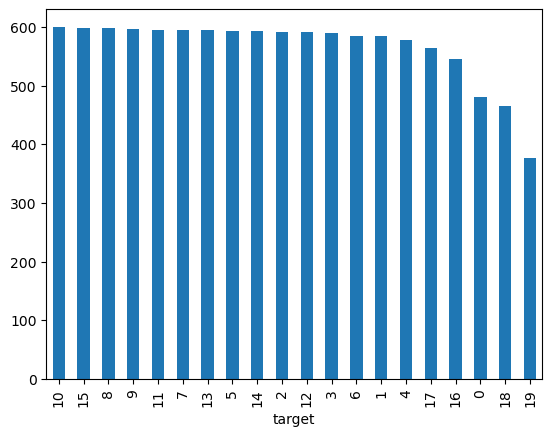

In [54]:
# 레이블 값의 분포를 시각화해보겠습니다.

data['target'].value_counts().plot(kind='bar');

10번 레이블의 수가 가장 많고, 19번 레이블의 수가 가장 적으며 대체적으로 400 ~ 600개 사이의 분포를 보입니다.
이번에는 각 레이블이 몇 개 있는지 구체적인 수치로 확인해보겠습니다.

In [55]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


데이터프레임으로부터 다시 메일 본문과 레이블을 분리하고, 테스트 데이터 또한 불러오겠습니다.
subset에 'test'를 기재하면 테스트 데이터를 불러옵니다. 훈련 데이터와 테스트 데이터의 본문과 레이블을 각각 저장합니다.

In [56]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

훈련 데이터와 테스트 데이터가 모두 준비되었습니다. 케라스의 토크나이저 도구를 사용하여 전처리를 진행해봅시다.

In [57]:
vocab_size = 10000
num_classes = 20

우선 필요한 변수들을 정의합니다. vocab_size는 이번 실습에서 사용할 최대 단어 개수를 정의하는 변수입니다.
뒤에서 케라스 토크나이저를 사용하면 빈도수 순으로 인덱스를 부여하므로, 빈도수가 가장 높은 상위 vocab_size 개수만큼의 단어를 사용합니다.

In [58]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word

케라스 토크나이저로 전처리를 수행하는 함수인 prepare_data를 만들었습니다.
해당 함수는 케라스 토크나이저를 통해 단어 토큰화를 수행하고,
앞서 배운 texts_to_matrix()를 사용하여 훈련 데이터와 테스트 데이터를 'binary', 'count', 'tfidf', 'freq' 4개의 모드 중 사용자가 정한 모드로 변환합니다.

In [59]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

메일 본문에 대해서는 'binary' 모드로 변환하고, 훈련 데이터와 테스트 데이터의 레이블은 원-핫 인코딩을 수행하였습니다.

In [60]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


훈련 데이터와 테스트 데이터 모두 메일 본문의 크기가 샘플의 수 × 10,000의 행렬로 변환되었는데,
열의 개수가 10,000인 것은 위의 prepard_data 함수 내부에서 Tokenizer의 num_words의 인자로 vocab_size를 지정해주었기 때문입니다.
사실 단어의 정수 인덱스는 1부터 시작하지만, 행렬의 인덱스는 0부터 시작하여 0번 인덱스는 사용되지 않으므로 실제로 행렬에는 빈도수 기준 상위 9,999개의 단어가 표현된 셈입니다.
빈도수 상위 1번 단어와 9,999번 단어를 확인해보겠습니다.

In [61]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


불용어에 해당되는 단어 'the'가 빈도수 상위 1번 단어가 된 것을 확인할 수 있습니다.

### 4. 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기
***

In [62]:
# 모델을 설계해보겠습니다. 우선 모델 설계에 필요한 도구들을 임포트합니다.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 다층 퍼셉트론을 설계합니다.

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

모델 설계를 fit_and_evaluate라는 함수 내에 정의하였는데, 모델을 함수 내에 정의한 이유는 이번 실습에서는 입력값을 바꿔가면서 모델을 여러번 호출하기 위함입니다.
우선은 모델의 아키텍처에 집중해보겠습니다.

![그림](img_50.png)

위의 그림은 현재 설계한 신경망의 구조를 보여줍니다. 현재 설계한 다층 퍼셉트론은 총 4개의 층을 가지고 있습니다.
vocab_size의 크기를 가진 입력층, 256개의 뉴런을 가진 첫번째 은닉층, 128개의 뉴런을 가진 두번째 은닉층, num_classes의 크기를 가진 출력층입니다.
또한 이번에 설계한 다층 퍼셉트론은 은닉층이 2개이므로 깊은 신경망(Deep Neural Network, DNN)입니다.

코드로 돌아가보겠습니다. 위 모델에서는 과적합을 막기 위해서 두 번의 드롭아웃(Dropout)을 적용하였습니다.
이 문제는 다중 클래스 분류 문제입니다. 여러 개의 선택지 중에서 하나의 선택지를 고르는 문제인데,
이 경우 20개의 주제 중에서 모델은 자신이 정답이라고 생각하는 1개의 주제를 예측해야 합니다.
다중 클래스 분류 문제이므로 출력층의 활성화 함수로는 소프트맥스 함수를 사용하고,
손실 함수로는 크로스 엔트로피(categorical_crossentropy) 함수를 사용하였습니다.

모델을 훈련시켜보겠습니다. 이번에는 앞서 배운 texts_to_matrix()의 4개의 모드에 대해서 전부 모델의 결과를 확인해보겠습니다.

In [64]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 3s 24ms/step - loss: 2.3033 - accuracy: 0.3312 - val_loss: 1.0197 - val_accuracy: 0.8092
Epoch 2/5
80/80 [==============================] - 2s 22ms/step - loss: 0.9127 - accuracy: 0.7494 - val_loss: 0.4813 - val_accuracy: 0.8790
Epoch 3/5
80/80 [==============================] - 2s 22ms/step - loss: 0.4524 - accuracy: 0.8787 - val_loss: 0.3448 - val_accuracy: 0.9028
Epoch 4/5
80/80 [==============================] - 2s 22ms/step - loss: 0.2717 - accuracy: 0.9265 - val_loss: 0.3146 - val_accuracy: 0.9125
Epoch 5/5
80/80 [==============================] - 2s 22ms/step - loss: 0.1828 - accuracy: 0.9539 - val_loss: 0.2991 - val_accuracy: 0.9099
binary 모드의 테스트 정확도: 0.8293945789337158
Epoch 1/5
80/80 [==============================] - 2s 24ms/step - loss: 2.7404 - accuracy: 0.2431 - val_loss: 1.6136 - val_accuracy: 0.7297
Epoch 2/5
80/80 [==============================] - 2s 21ms/step - loss: 1.4639 - accuracy: 0.6309 - val_loss: 0.7469 - va

각 모드에 대해서 총 5회의 에포크를 수행하는데, 각 모드에 대한 정확도는 다음과 같이 나왔습니다.
- binary 모드의 테스트 정확도: 0.8312533
- count 모드의 테스트 정확도: 0.8239511
- tfidf 모드의 테스트 정확도: 0.8381572
- freq 모드의 테스트 정확도: 0.6902549

대체적으로 82% ~ 83%의 비슷한 정확도를 보이는데, 'freq' 모드에서만 정확도가 69%가 나왔습니다.
아무래도 'freq' 모드는 이번 문제를 풀기위한 적절한 전처리 방법이 아니었던 것 같습니다.

## 07-12 피드 포워드 신경망 언어 모델(Neural Network Language Model, NNLM)
***

신경망 언어 모델의 시초인 피드 포워드 신경망 언어 모델(Feed Forward Neural Network Language Model)에 대해서 학습합니다.
간단히 줄여 NNLM이라고 합시다. 뒤에서 RNNLM, BiLM 등 보다 발전된 신경망 언어 모델들을 배웁니다.

```
이 모델은 제안 되었을 당시 NPLM(Neural Probabilistic Language Model)이라는 이름을 갖고 있었습니다.
```

### 1. 기존 N-gram 언어 모델의 한계
***

언어 모델은 문장에 확률을 할당하는 모델이며, 주어진 문맥으로부터 아직 모르는 단어를 예측하는 것을 언어 모델링이라고 한다고 언급한 바 있습니다.
다음은 이전 단어들로부터 다음 단어를 예측하는 언어 모델링(Language Modeling) 의 예를 보여줍니다.

In [1]:
# 다음 단어 예측하기
# An adorable little boy is spreading ____

위 문장을 가지고 앞서 배운 n-gram 언어 모델이 언어 모델링을 하는 방법을 복습해봅시다.

![그림](img_51.png)

n-gram 언어 모델은 언어 모델링에 바로 앞 n-1개의 단어를 참고합니다. 4-gram 언어 모델이라고 가정해봅시다.
모델은 바로 앞 3개의 단어만 참고하며 더 앞의 단어들은 무시합니다. 위 예제에서 다음 단어 예측에 사용되는 단어는 boy, is, spreading입니다.

![그림](img_52.png)


### 2. 단어의 의미적 유사성
***

희소 문제는 기계가 단어의 의미적 유사성을 알수 있다면 해결할 수 있는 문제입니다.
실제 사람의 사례를 들어 이야기해보겠습니다. 저자는 최근 '톺아보다'라는 생소한 단어를 배웠고, '톺아보다'가 '샅샅이 살펴보다'와 유사한 의미임을 학습했습니다.
그리고 '발표 자료를 살펴보다'라는 표현 대신 '발표 자료를 톺아보다'라는 표현을 써봤습니다.
저는 '발표 자료를 톺아보다'라는 예문을 어디서 읽은 적은 없지만 두 단어가 유사함을 학습하였으므로 단어를 대신 선택하여 자연어 생성을 할 수 있었습니다.

기계도 마찬가지입니다. '발표 자료를 살펴보다'라는 단어 시퀀스는 존재하지만, '발표 자료를 톺아보다'라는 단어 시퀀스는 존재하지 않는 코퍼스를 학습한 언어 모델이 있다고 가정해봅시다.
언어 모델은 아래 선택지에서 다음 단어를 예측해야 합니다.

- $P(톺아보다|발표자료를)$
- $P(냠냠하다|발표자료를)$

저자의 경우에는 '살펴보다'와 '톺아보다'의 유사성을 학습하였고 이를 근거로 두 선택지 중에서 '톺아보다'가 더 맞는 선택이라고 판단할 수 있습니다.
하지만 n-gram 언어 모델은 '발표 자료를' 다음에 '톺아보다'가 나올 확률  $P(톺아보다|발표자료를)$를 0으로 연산합니다.
n-gram 언어 모델은 '살펴보다'와 '톺아보다'의 단어의 유사도를 알 수 없으므로 예측에 고려할 수 없습니다.

만약 언어 모델 또한 단어의 의미적 유사성을 학습할 수 있도록 설계한다면,
훈련 코퍼스에 없는 단어 시퀀스에 대한 예측이라도 유사한 단어가 사용된 단어 시퀀스를 참고하여 보다 정확한 예측을 할 수 있습니다.
그리고 이러한 아이디어를 반영한 언어 모델이 신경망 언어 모델 NNLM입니다.
그리고 이 아이디어는 단어 벡터 간 유사도를 구할 수 있는 벡터를 얻어내는 워드 임베딩(word embedding) 의 아이디어이기도 합니다.
NNLM이 어떻게 훈련 과정에서 단어의 유사도를 학습할 수 있는지 알아봅시다.


###3. 피드 포워드 신경망 언어 모델(NNLM)
***

NNLM이 언어 모델링을 학습하는 과정을 보겠습니다. 이해를 위해 간소화 된 형태로 설명합니다.

- 예문 : "what will the fat cat sit on"

예를 들어 훈련 코퍼스에 위와 같은 문장이 있다고 해봅시다. 언어 모델은 주어진 단어 시퀀스로부터 다음 단어를 예측합니다.
훈련 과정에서는 'what will the fat cat'이라는 단어 시퀀스가 입력으로 주어지면, 다음 단어 'sit'을 예측하는 방식으로 훈련됩니다.

훈련 코퍼스가 준비된 상태에서 가장 먼저 해야 할 일은 기계가 단어를 인식할 수 있도록 모든 단어를 수치화하는 것입니다.
훈련 코퍼스에 7개의 단어만 존재한다고 가정했을 때 위 단어들을 다음과 같이 원-핫 인코딩 할 수 있습니다.

```
what = [1, 0, 0, 0, 0, 0, 0]
will = [0, 1, 0, 0, 0, 0, 0]
the = [0, 0, 1, 0, 0, 0, 0]
fat = [0, 0, 0, 1, 0, 0, 0]
cat = [0, 0, 0, 0, 1, 0, 0]
sit = [0, 0, 0, 0, 0, 1, 0]
on = [0, 0, 0, 0, 0, 0, 1]
```

모든 단어가 단어 집합(vocabulary)의 크기인 7의 차원을 가지는 원-핫 벡터가 되었습니다.
이 원-핫 벡터들이 훈련을 위한 NNLM의 입력이면서 예측을 위한 레이블이 됩니다.
'what will the fat cat'를 입력을 받아서 'sit'을 예측하는 일은 기계에게 what, will, the, fat, cat의 원-핫 벡터를 입력받아 sit의 원-핫 벡터를 예측하는 문제입니다.

NNLM은 n-gram 언어 모델처럼 다음 단어를 예측할 때, 앞의 모든 단어를 참고하는 것이 아니라 정해진 개수의 단어만을 참고합니다.
이 개수를 n이라고 하고 n을 4라고 해봅시다. 이때, 언어 모델은 'what will the fat cat'라는 단어 시퀀스가 주어졌을 때,
다음 단어를 예측하기 위해 앞의 4개 단어 'will the fat cat'까지만 참고하고 그 앞 단어인 what은 무시합니다.
이 범위를 윈도우(window)라고 하기도 하는데, 여기서 윈도우의 크기인 n은 4입니다.

![그림](img_53.png)

NNLM의 구조를 보겠습니다. NNLM은 위의 그림과 같이 총 4개의 층(layer)으로 이루어진 인공 신경망입니다.
입력층(input layer)을 보면 앞에서 윈도우의 크기는 4로 정하였으므로 입력은 4개의 단어 'will, the, fat, cat'의 원-핫 벡터입니다.
출력층(output layer)을 보면 모델이 예측해야하는 정답에 해당되는 단어 sit의 원-핫 벡터는 모델이 예측한 값의 오차를 구하기 위해 레이블로서 사용됩니다.
그리고 오차로부터 손실 함수를 사용하여 인공 신경망이 학습을 하게 됩니다.

내부 메커니즘을 따라가봅시다. 4개의 원-핫 벡터를 입력 받은 NNLM은 다음층인 투사층(projection layer)을 지나게 됩니다.
인공 신경망에서 입력층과 출력층 사이의 층은 보통 은닉층이라고 부르는데, 여기서 투사층이라고 명명한 이 층은 일반 은닉층과 다르게 가중치 행렬과의 곱셈은 이루어지지만 활성화 함수가 존재하지 않습니다.

투사층의 크기를 M으로 설정하면, 각 입력 단어들은 투사층에서 V × M 크기의 가중치 행렬과 곱해집니다.
여기서 V는 단어 집합의 크기를 의미합니다. 만약 원-핫 벡터의 차원이 7이고, M이 5라면 가중치 행렬 W는 7 × 5 행렬이 됩니다.

![그림](img_54.png)

각 단어의 원-핫 벡터와 가중치 W 행렬의 곱이 어떻게 이루어지는지 보겠습니다.
위 그림에서는 각 원-핫 벡터를 $x$로 표기하였습니다.
원-핫 벡터의 특성으로 인해 i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 원-핫 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일합니다.
그래서 이 작업을 룩업 테이블(lookup table)이라고 합니다.

룩업 테이블 후에는 V차원을 가지는 원-핫 벡터는 이보다 더 차원이 작은 M차원의 벡터로 맵핑됩니다.
위 그림에서 단어 fat을 의미하는 원-핫 벡터를 $xfat$으로 표현했고,
테이블 룩업 과정을 거친 후의 단어 벡터는 $efat$으로 표현했습니다.
이 벡터들은 초기에는 랜덤한 값을 가지지만 학습 과정에서 값이 계속 변경되는데 이 단어 벡터를 임베딩 벡터(embedding vector) 라고 합니다.

![그림](img_55.png)

각 단어가 테이블 룩업을 통해 임베딩 벡터로 변경되고, 투사층에서 모든 임베딩 벡터들의 값은 연결됩니다(concatenate).
여기서 벡터의 연결 연산은 벡터들을 이어붙이는 것을 의미합니다. 가령, 5차원 벡터 4개를 연결한다는 의미는 20차원 벡터를 얻는다는 의미입니다. 
$x$를 각 단어의 원-핫 벡터, NNLM이 예측하고자 하는 단어가 문장에서 $t$번째 단어라고 하고, 윈도우의 크기를 $n$,
룩업 테이블을 의미하는 함수를 $lookup$, 세미콜론(;)을 연결 기호로 하였을 때 투사층을 식으로 표현하면 아래와 같습니다.

![그림](img_56.png)

일반적인 은닉층이 활성화 함수를 사용하는 비선형층(nonlinear layer)인 것과는 달리 투사층은 활성화 함수가 존재하지 않는 선형층(linear layer)이라는 점이 다소 생소하지만,
이 다음은 다시 은닉층을 사용하는 일반적인 피드 포워드 신경망과 동일합니다.

![그림](img_57.png)

투사층의 결과는 h의 크기를 가지는 은닉층을 지납니다.
일반적인 피드 포워드 신경망에서 은닉층을 지난다는 것은 은닉층의 입력은 가중치 곱해진 후 편향이 더해져 활성화 함수의 입력이 된다는 의미입니다.
이때의 가중치와 편향을 $Wh$와 $bh$이라고 하고, 은닉층의 활성화 함수를 하이퍼볼릭탄젠트 함수라고 하였을 때, 은닉층을 식으로 표현하면 아래와 같습니다.

![그림](img_58.png)

은닉층의 출력은 V의 크기를 가지는 출력층으로 향합니다.
이 과정에서 다시 또 다른 가중치와 곱해지고 편향이 더해지면, 입력이었던 원-핫 벡터들과 동일하게 V차원의 벡터를 얻습니다.
만약 입력 벡터의 차원이 7이었다면 해당 벡터도 동일한 차원 수를 가집니다.
출력층에서는 활성화 함수로 소프트맥스(softmax) 함수를 사용하는데,
V차원의 벡터는 소프트맥스 함수를 지나면서 벡터의 각 원소는 0과 1사이의 실수값을 가지며 총 합은 1이 되는 상태로 바뀝니다.
이 벡터를 NNLM의 예측값이라는 의미에서 $\hat{y}$라고 합시다. 이를 식으로 표현하면 아래와 같습니다.

![그림](img_59.png)

벡터 $\hat{y}$의 각 차원 안에서의 값이 의미하는 것은 이와 같습니다. 
$\hat{y}$의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 다음 단어일 확률을 나타냅니다.
그리고 $\hat{y}$는 실제값. 즉, 실제 정답에 해당되는 단어인 원-핫 벡터의 값에 가까워져야 합니다.
실제값에 해당되는 다음 단어를 $y$라고 했을 때, 이 두 벡터가 가까워지게 하기위해서 NNLM는 손실 함수로 크로스 엔트로피(cross-entropy) 함수를 사용합니다.
해당 문제는 단어 집합의 모든 단어라는 V개의 선택지 중 정답인 'sit'을 예측해야하는 다중 클래스 분류 문제입니다.
그리고 역전파가 이루어지면 모든 가중치 행렬들이 학습되는데, 여기에는 투사층에서의 가중치 행렬도 포함되므로 임베딩 벡터값 또한 학습됩니다.

이번 예제에서는 7개의 단어만 사용했지만, 만약 충분한 훈련 데이터가 있다는 가정 하에 NNLM이 얻을 수 있는 이점은 무엇일까요?
NNLM의 핵심은 충분한 양의 훈련 코퍼스를 위와 같은 과정으로 학습한다면 결과적으로 수많은 문장에서 유사한 목적으로 사용되는 단어들은 결국 유사한 임베딩 벡터값을 얻게되는 것에 있습니다.
이렇게 되면 훈련이 끝난 후 다음 단어를 예측 과정에서 (마치 앞서 언급한 저자의 '톺아보기'와 같은 예시처럼) 훈련 코퍼스에서 없던 단어 시퀀스라 하더라도 다음 단어를 선택할 수 있습니다.

단어 간 유사도를 구할 수 있는 임베딩 벡터의 아이디어는 Word2Vec, FastText, GloVe 등으로 발전되어서 딥 러닝 자연어 처리 모델에서는 필수적으로 사용되는 방법이 되었습니다.
임베딩 벡터에 대해서는 워드 임베딩 챕터에서 좀 더 자세히 다룹니다.


### 4. NNLM의 이점과 한계
***

NNLM은 기존 n-gram 언어 모델의 한계를 개선하였지만 여전히 가지는 문제점이 있습니다.

#### 1) 기존 모델에서의 개선점
NNLM은 단어를 표현하기 위해 임베딩 벡터를 사용하므로서 단어의 유사도를 계산할 수 있었습니다. 그리고 이를 통해 희소 문제(sparsity problem)를 해결하였습니다.


#### 2) 고정된 길이의 입력(Fixed-length input)
NNLM이 극복하지 못한 한계 또한 존재합니다. NNLM은 n-gram 언어 모델과 마찬가지로 다음 단어를 예측하기 위해 모든 이전 단어를 참고하는 것이 아니라 정해진 n개의 단어만을 참고할 수 있습니다.
이 한계를 극복할 수 있는 언어 모델이 있는데, 다음 챕터에서 배우게 될 RNN(Recurrent Neural Network)을 사용한 RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)입니다.

